In [2]:
import signac
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

from cmeutils.structure import bond_distribution
from msibi.utils.smoothing import savitzky_golay

In [11]:
def generate_color_gradient(start_color, end_color, num_steps):
    """Generate a gradient of colors between two given colors.

    Parameters:
    - start_color: Starting color in RGB format (e.g., [r, g, b])
    - end_color: Ending color in RGB format (e.g., [r, g, b])
    - num_steps: Number of steps in the gradient

    Returns:
    - colors: List of color codes representing the gradient
    """
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [start_color, end_color])
    norm = mcolors.Normalize(vmin=0, vmax=num_steps-1)
    colors = [cmap(norm(i)) for i in range(num_steps)]
    return colors


# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 3
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 1

In [4]:
SAVE_FIGS = True

# One bead per monomer:

In [6]:
#bond_project = signac.get_project("../../msibi-flow/bond-flow/")
#angle_project = signac.get_project("../../msibi-flow/angle-flow/")
pair_project = signac.get_project("../../msibi-flow/pair-flow-3-states-unordered/")

## Bond Results

### Plotting Final Potentials:

(-5.0, 60.0)

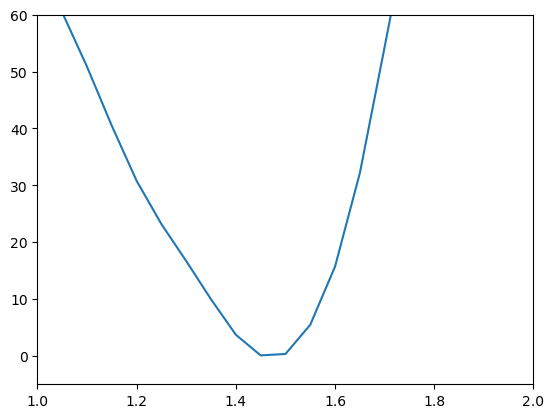

In [3]:
fig = plt.figure()
for job in bond_project:
    final_pot = np.genfromtxt(job.fn("A-A_bond.csv"), names=True, delimiter=",")
    plt.plot(final_pot["x"], final_pot["potential"])

plt.xlim(1, 2)
plt.ylim(-5, 60)

### Plotting Bond Distributions

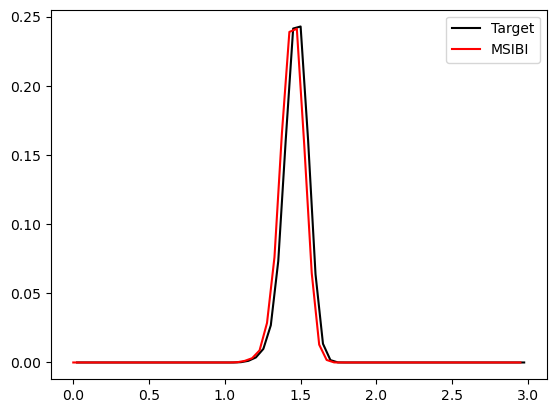

In [4]:
fig = plt.figure()
for job in bond_project:
    state = np.load(job.fn("state_A_bond_A-A_data.npz"))
    target = state["target_distribution"]
    msibi = state["current_distribution"]

    plt.plot(target[:,0], target[:,1], label="Target", color="k")
    plt.plot(msibi[:,0], msibi[:,1], label="MSIBI", color="r")

plt.legend()
plt.show()

## Angle Results

### Plotting Final Potentials:

d23d8c3ba38040009adda789dca01050
fd897cd5cffaba0fba0ffb176b0fad28


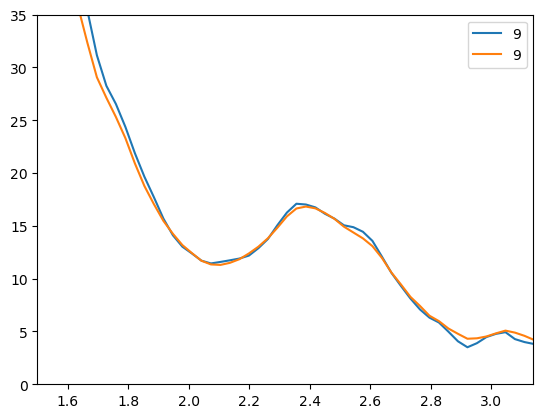

In [11]:
fig = plt.figure()
for job in angle_project:
    print(job.id)
    final_pot = np.genfromtxt(job.fn("A-A-A_angle.csv"), names=True, delimiter=",")
    plt.plot(final_pot["x"], final_pot["potential"], label=job.sp.smoothing_window)

plt.xlim(1.5, 3.14)
plt.ylim(0, 35)
plt.legend()

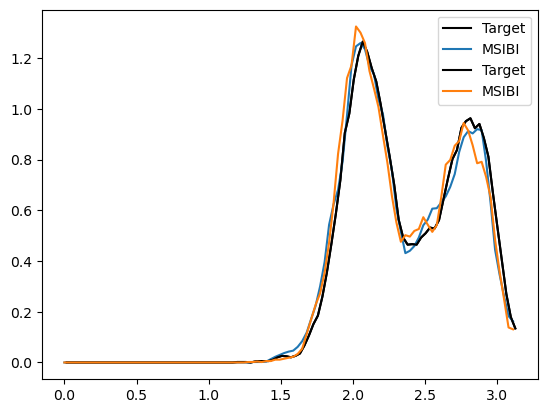

In [8]:
fig = plt.figure()
for job in angle_project:
    state = np.load(job.fn("state_A_angle_A-A-A_data.npz"))
    target = state["target_distribution"]
    msibi = state["current_distribution"]

    plt.plot(target[:,0], target[:,1], label="Target", color="k")
    plt.plot(msibi[:,0], msibi[:,1], label="MSIBI")

plt.legend()
plt.show()

## Pair MSIBI Results

### Plotting Final Potentials:

b4289482ca51d698463f1c62717db7d8 4.0 1


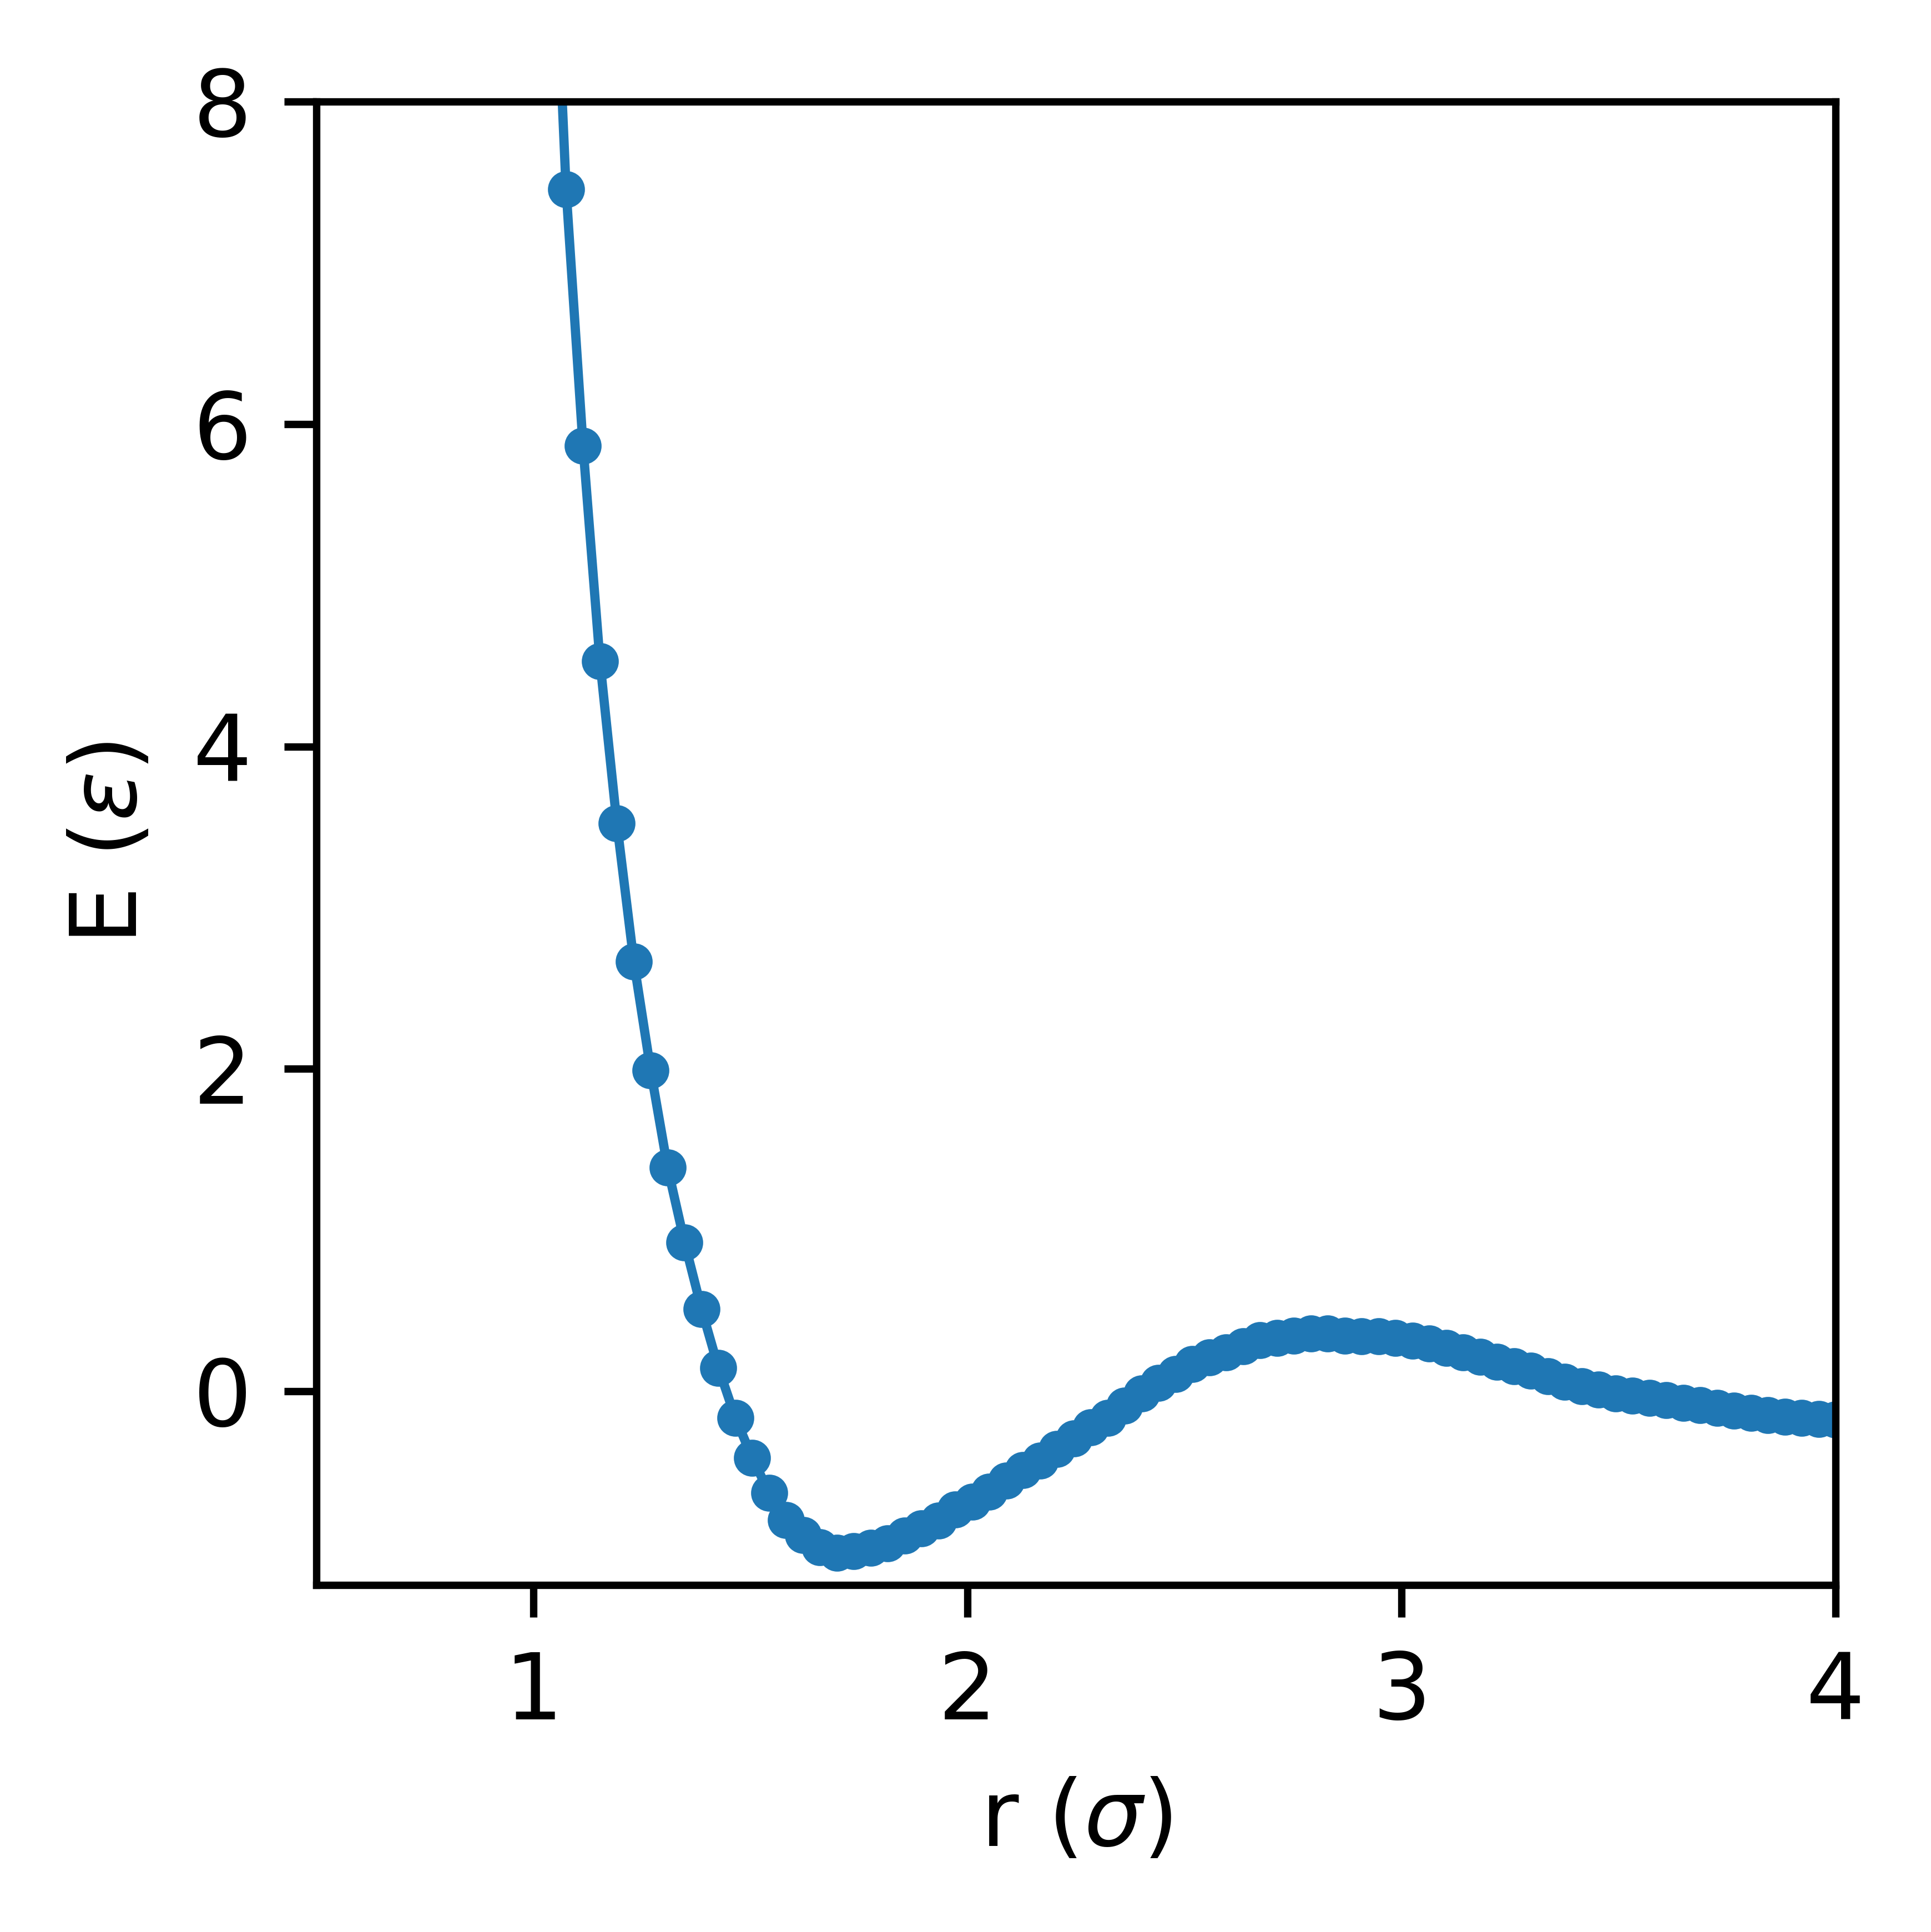

In [12]:
r_cut = 4.0

for job in pair_project.find_jobs({"doc.done": True, "r_cut": 4.0}):
    states = [s["name"] for s in job.sp.states]
    #if states[0] != "Melted": continue
    print(job.id, job.sp.r_cut, job.sp.T_scale)
    final_pot = np.genfromtxt(job.fn("A-A_pair.csv"), names=True, delimiter=",")
    pot_min = np.min(final_pot["potential"])
    x = final_pot["x"]
    y = final_pot["potential"] - pot_min - 1
    plt.plot(x, y, marker="o")


plt.xlim(0.5, 4.0)
plt.ylim(-1.2, 8)
plt.xlabel("r $(\sigma)$")
plt.ylabel("E $(\epsilon)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig("../../FIGS/msibi-pair-potential.png")
plt.show()

(0.4, 4.0)

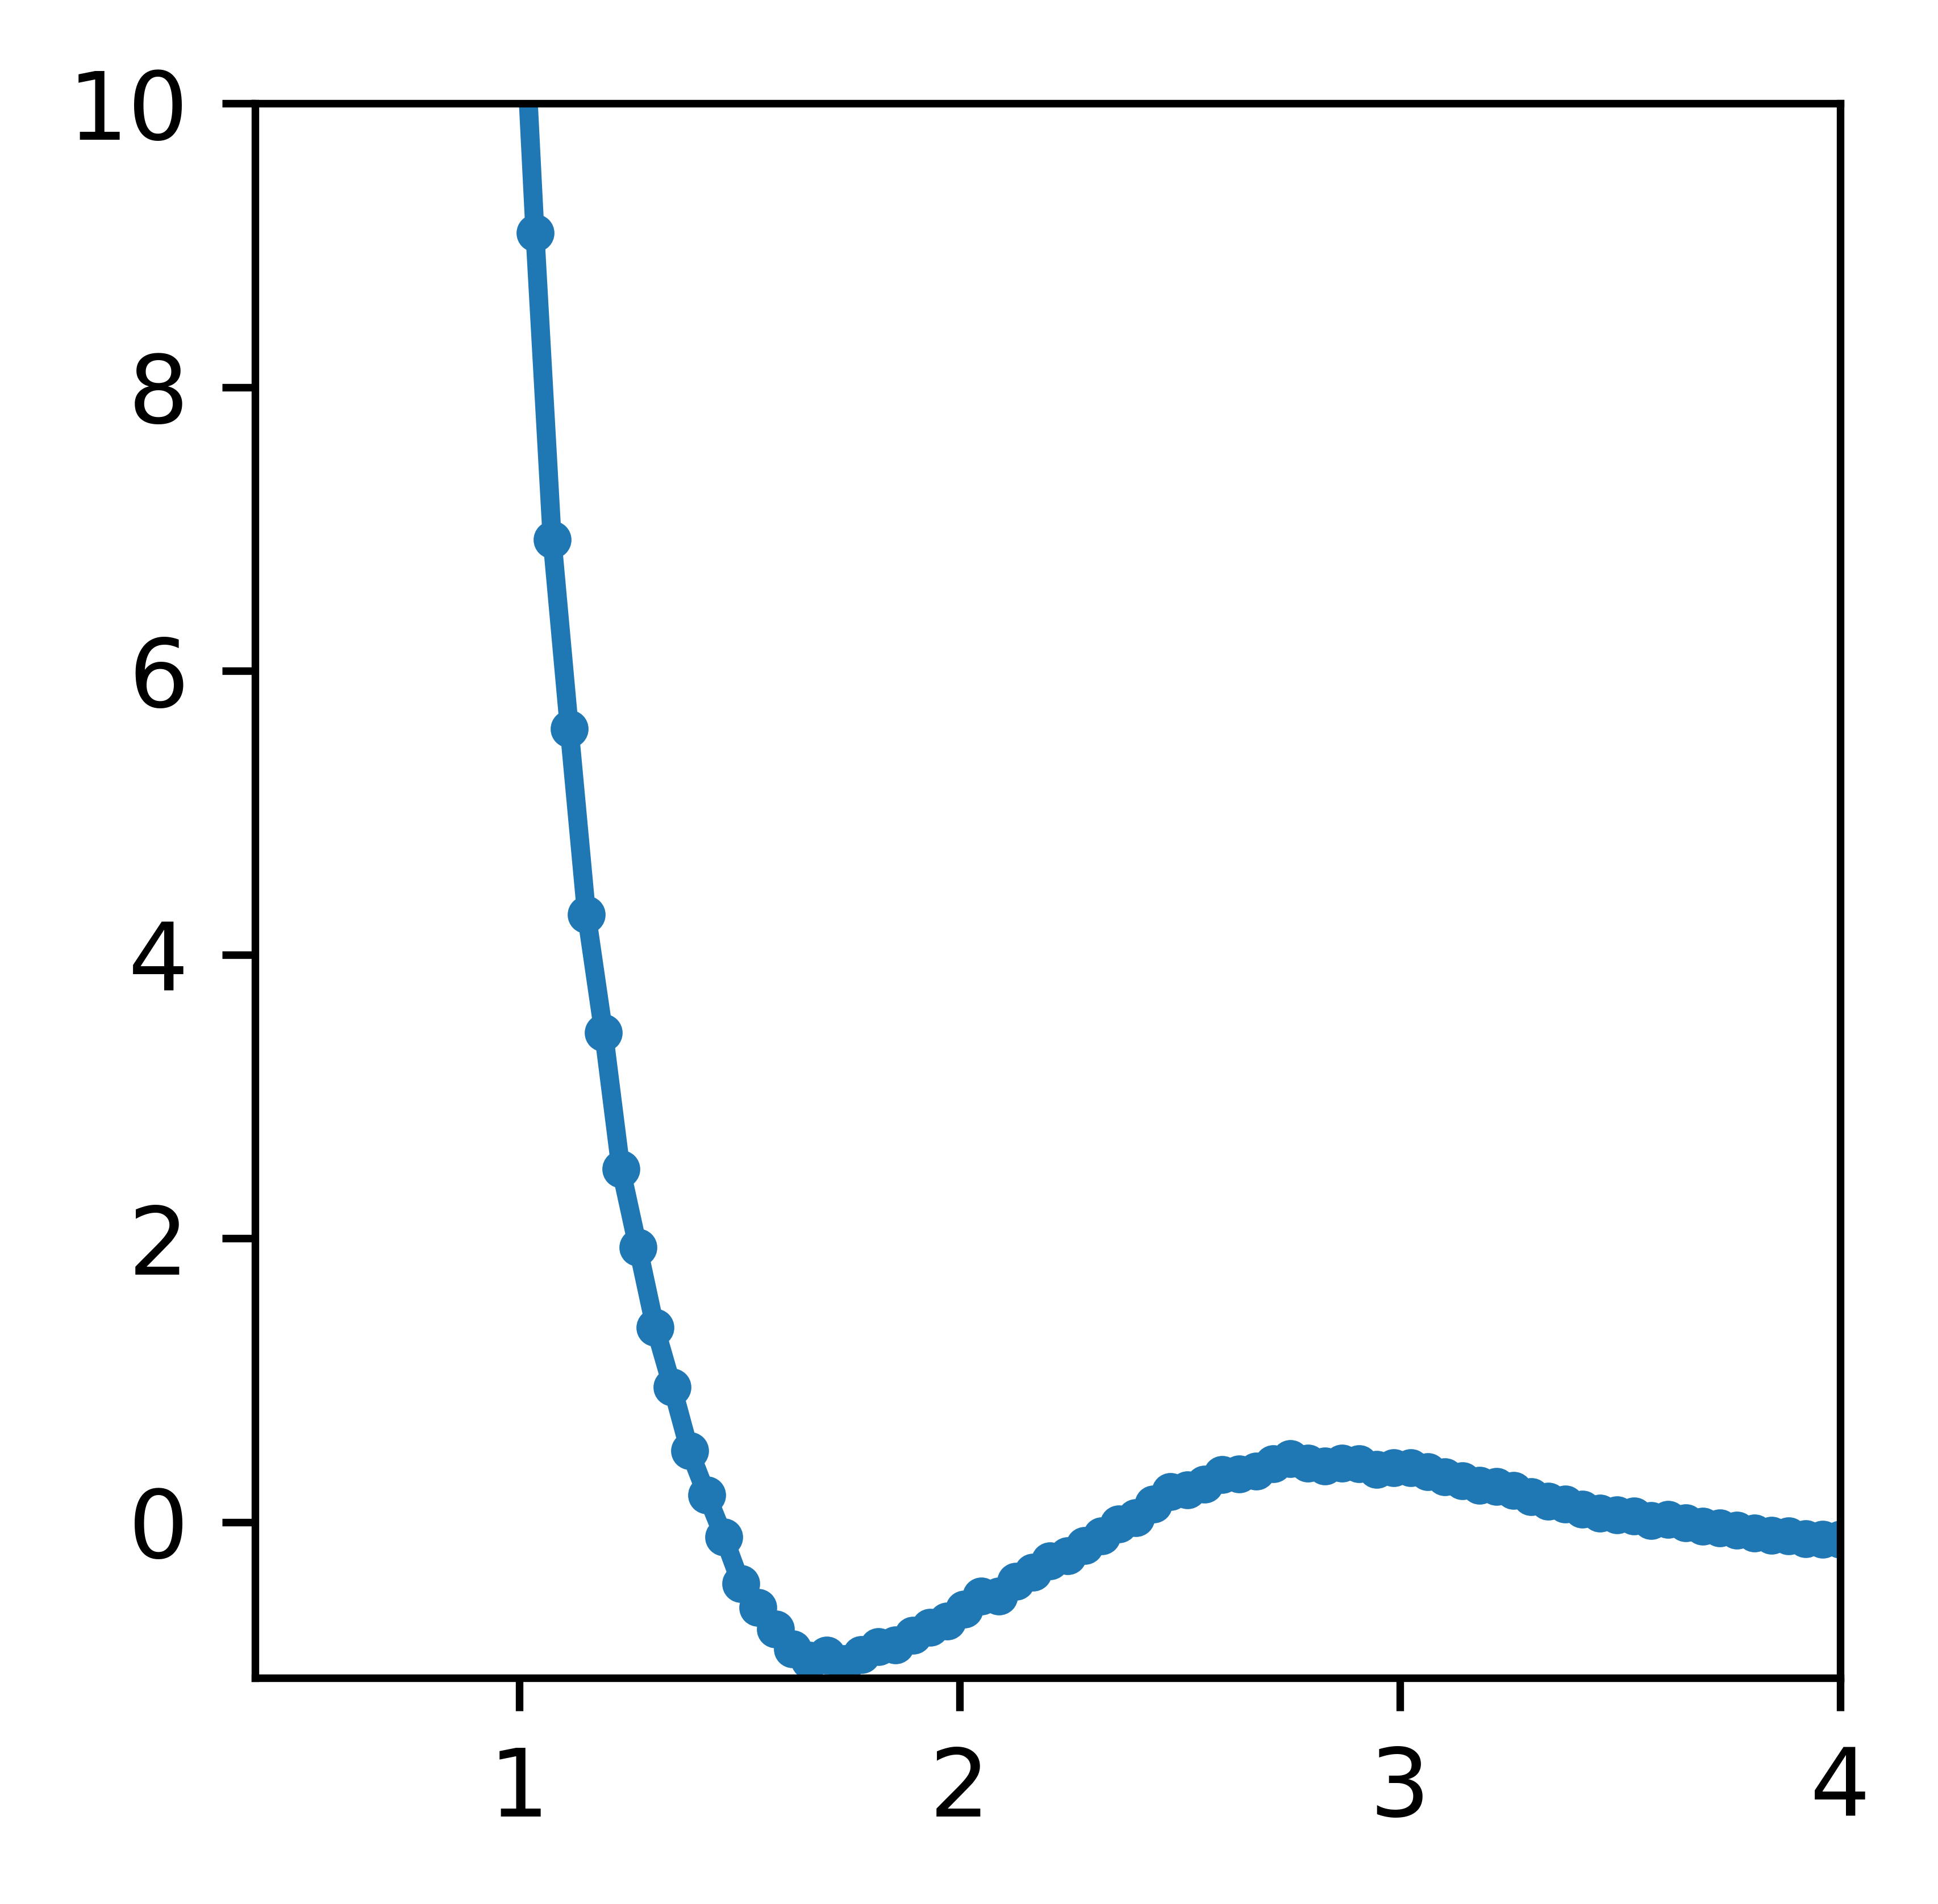

In [9]:
job = pair_project.open_job(id="b4289482ca51d698463f1c62717db7d8")
iteration = -1

fig = plt.figure()
pot_history = np.load(job.fn("A-A_potential_history.npy"))
pot = pot_history[iteration]
plt.plot(pot[:,0], pot[:,1] - pot[:,1].min() - 1, "o-")

plt.ylim(-1.1, 10)
plt.xlim(0.4, job.sp.r_cut)

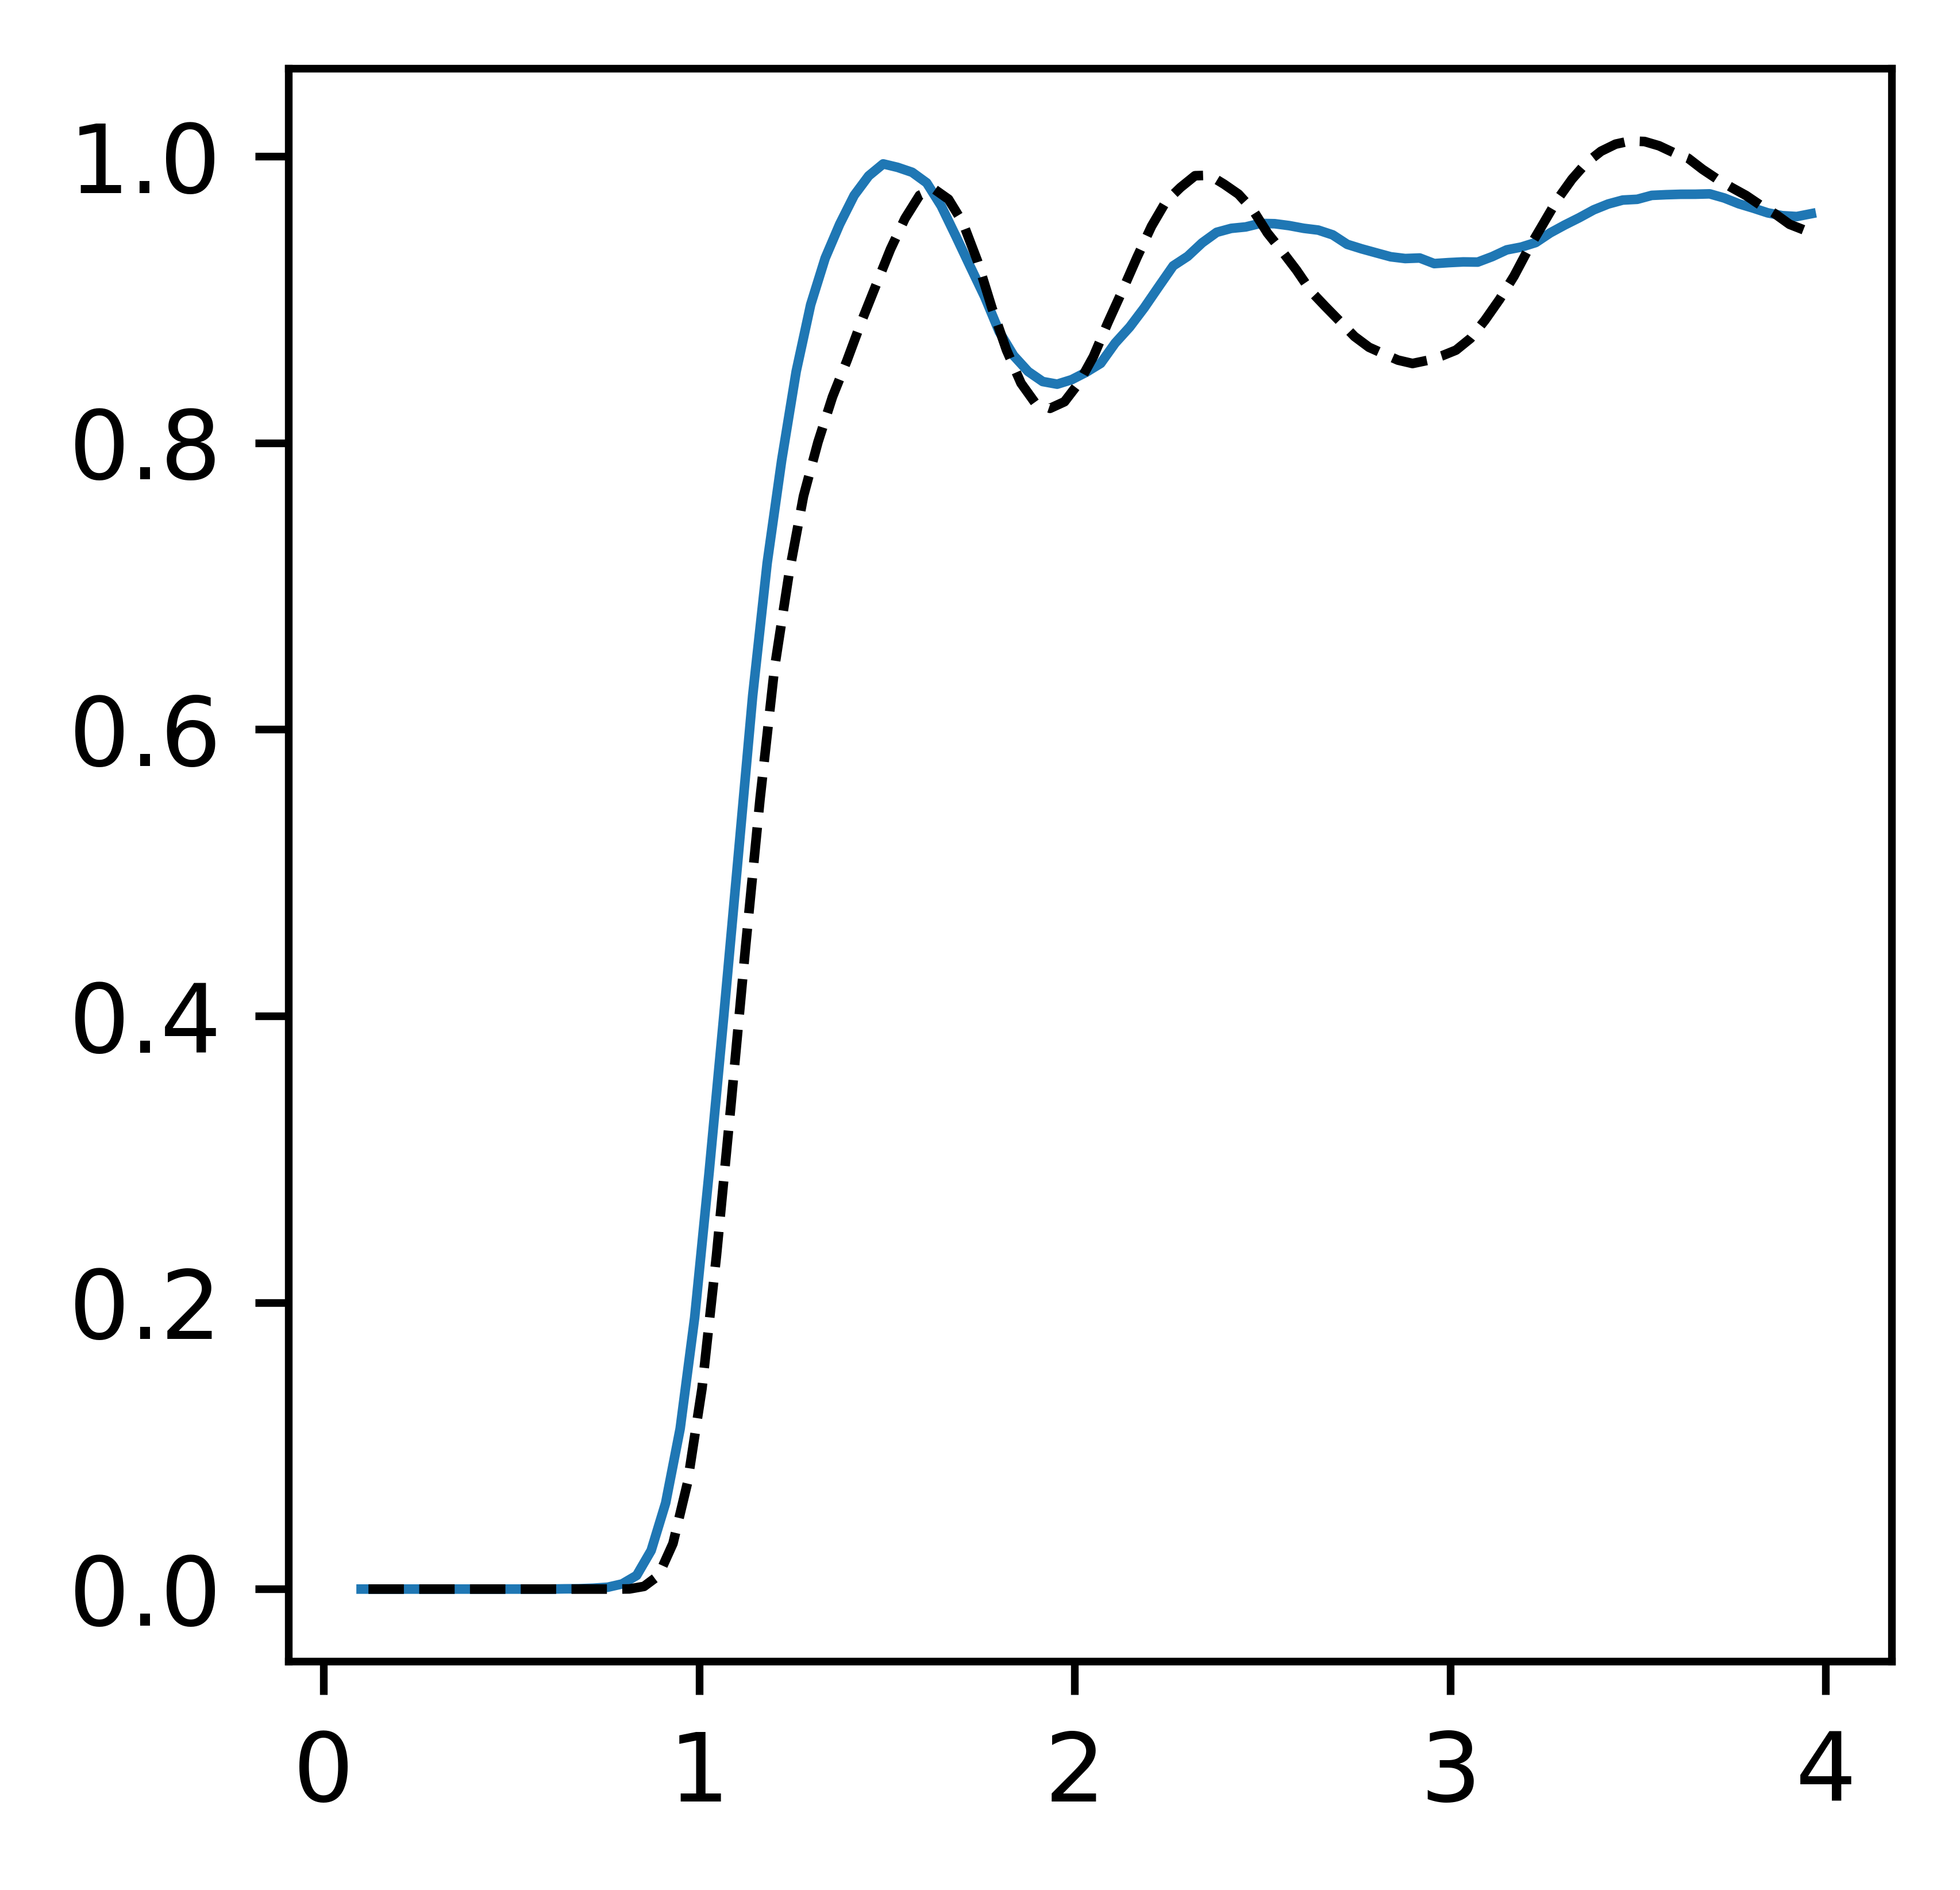

In [37]:
ordered_state = np.load(job.fn("state_Ordered_pair_A-A_data.npz"))
dist = ordered_state["distribution_history"][iteration]
target_dist = ordered_state["target_distribution"]
plt.plot(dist[:,0], dist[:,1])
plt.plot(target_dist[:,0], target_dist[:,1], "k--")

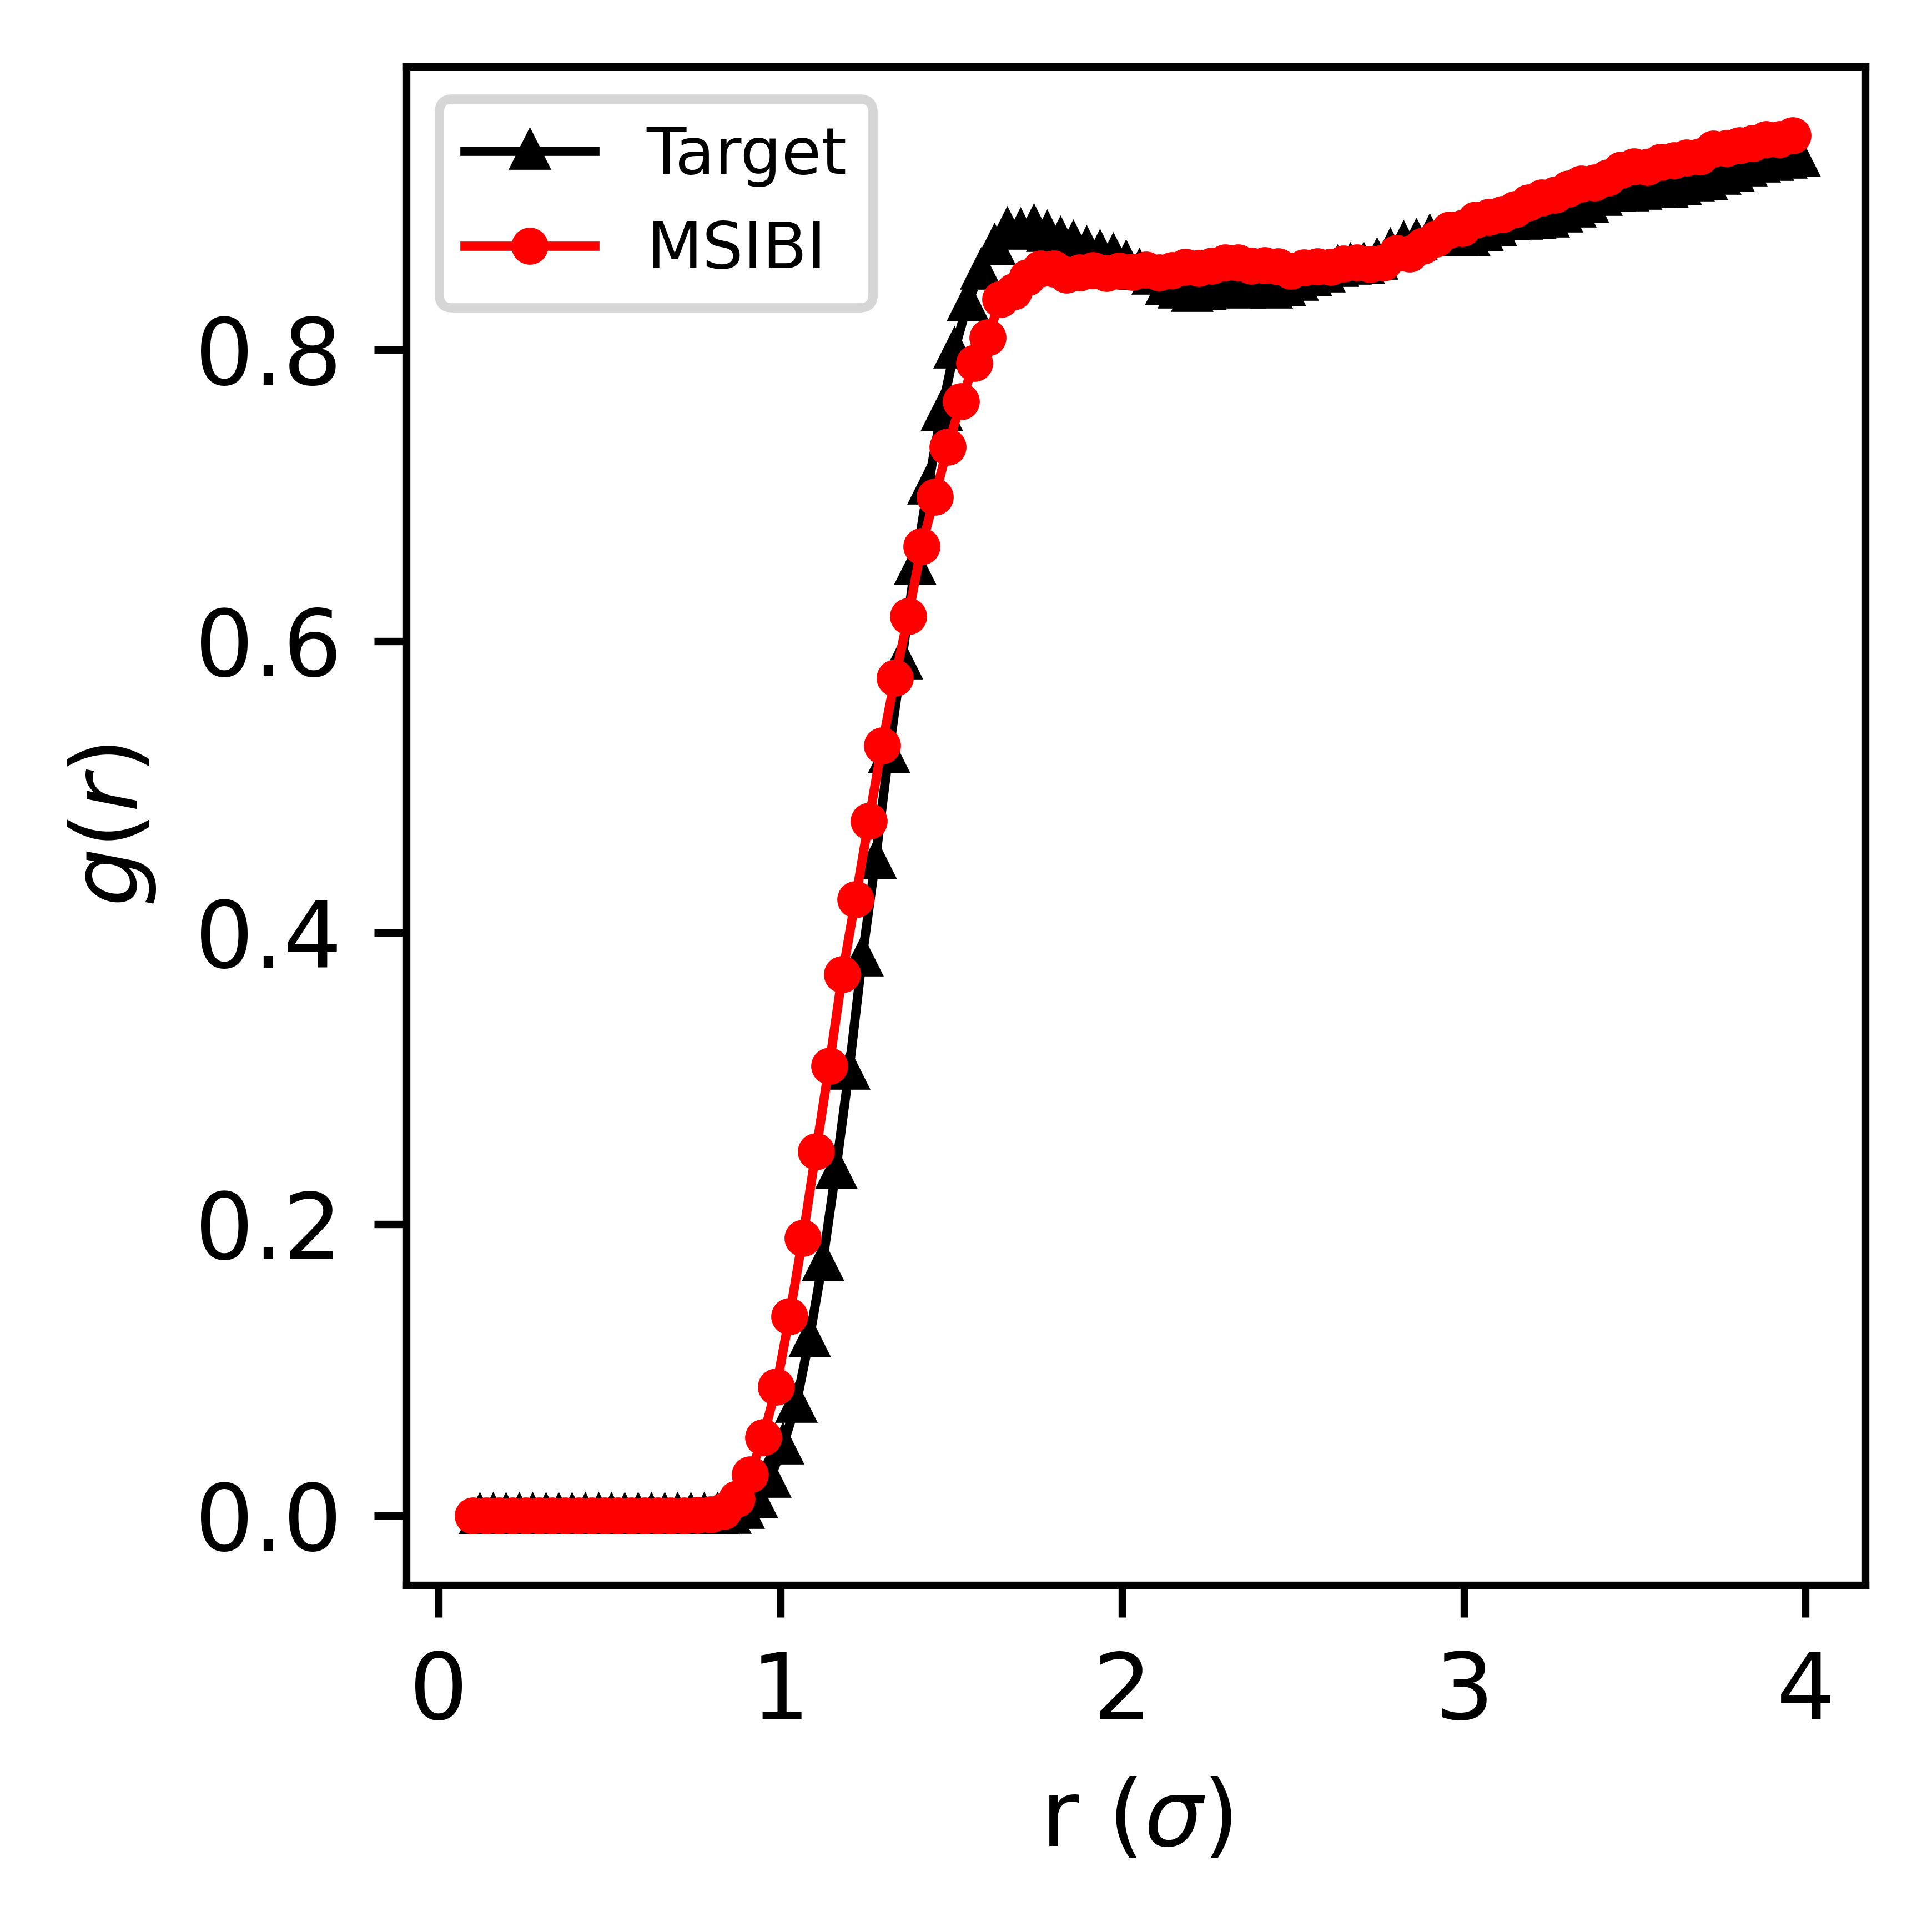

In [13]:
state_name = "melt"
melt_state = np.load(job.fn("state_Melted_pair_A-A_data.npz"))
dist = melt_state["distribution_history"][iteration]
target_dist = melt_state["target_distribution"]
plt.plot(target_dist[:,0], target_dist[:,1], color="k", marker="^", label="Target")
plt.plot(dist[:,0], dist[:,1], color="r", marker="o", label="MSIBI")

plt.legend(loc="upper left")
plt.xlabel("r $(\sigma)$")
plt.ylabel("$g(r)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig(f"../../FIGS/msibi-rdf-match-{state_name}.png")
plt.show()

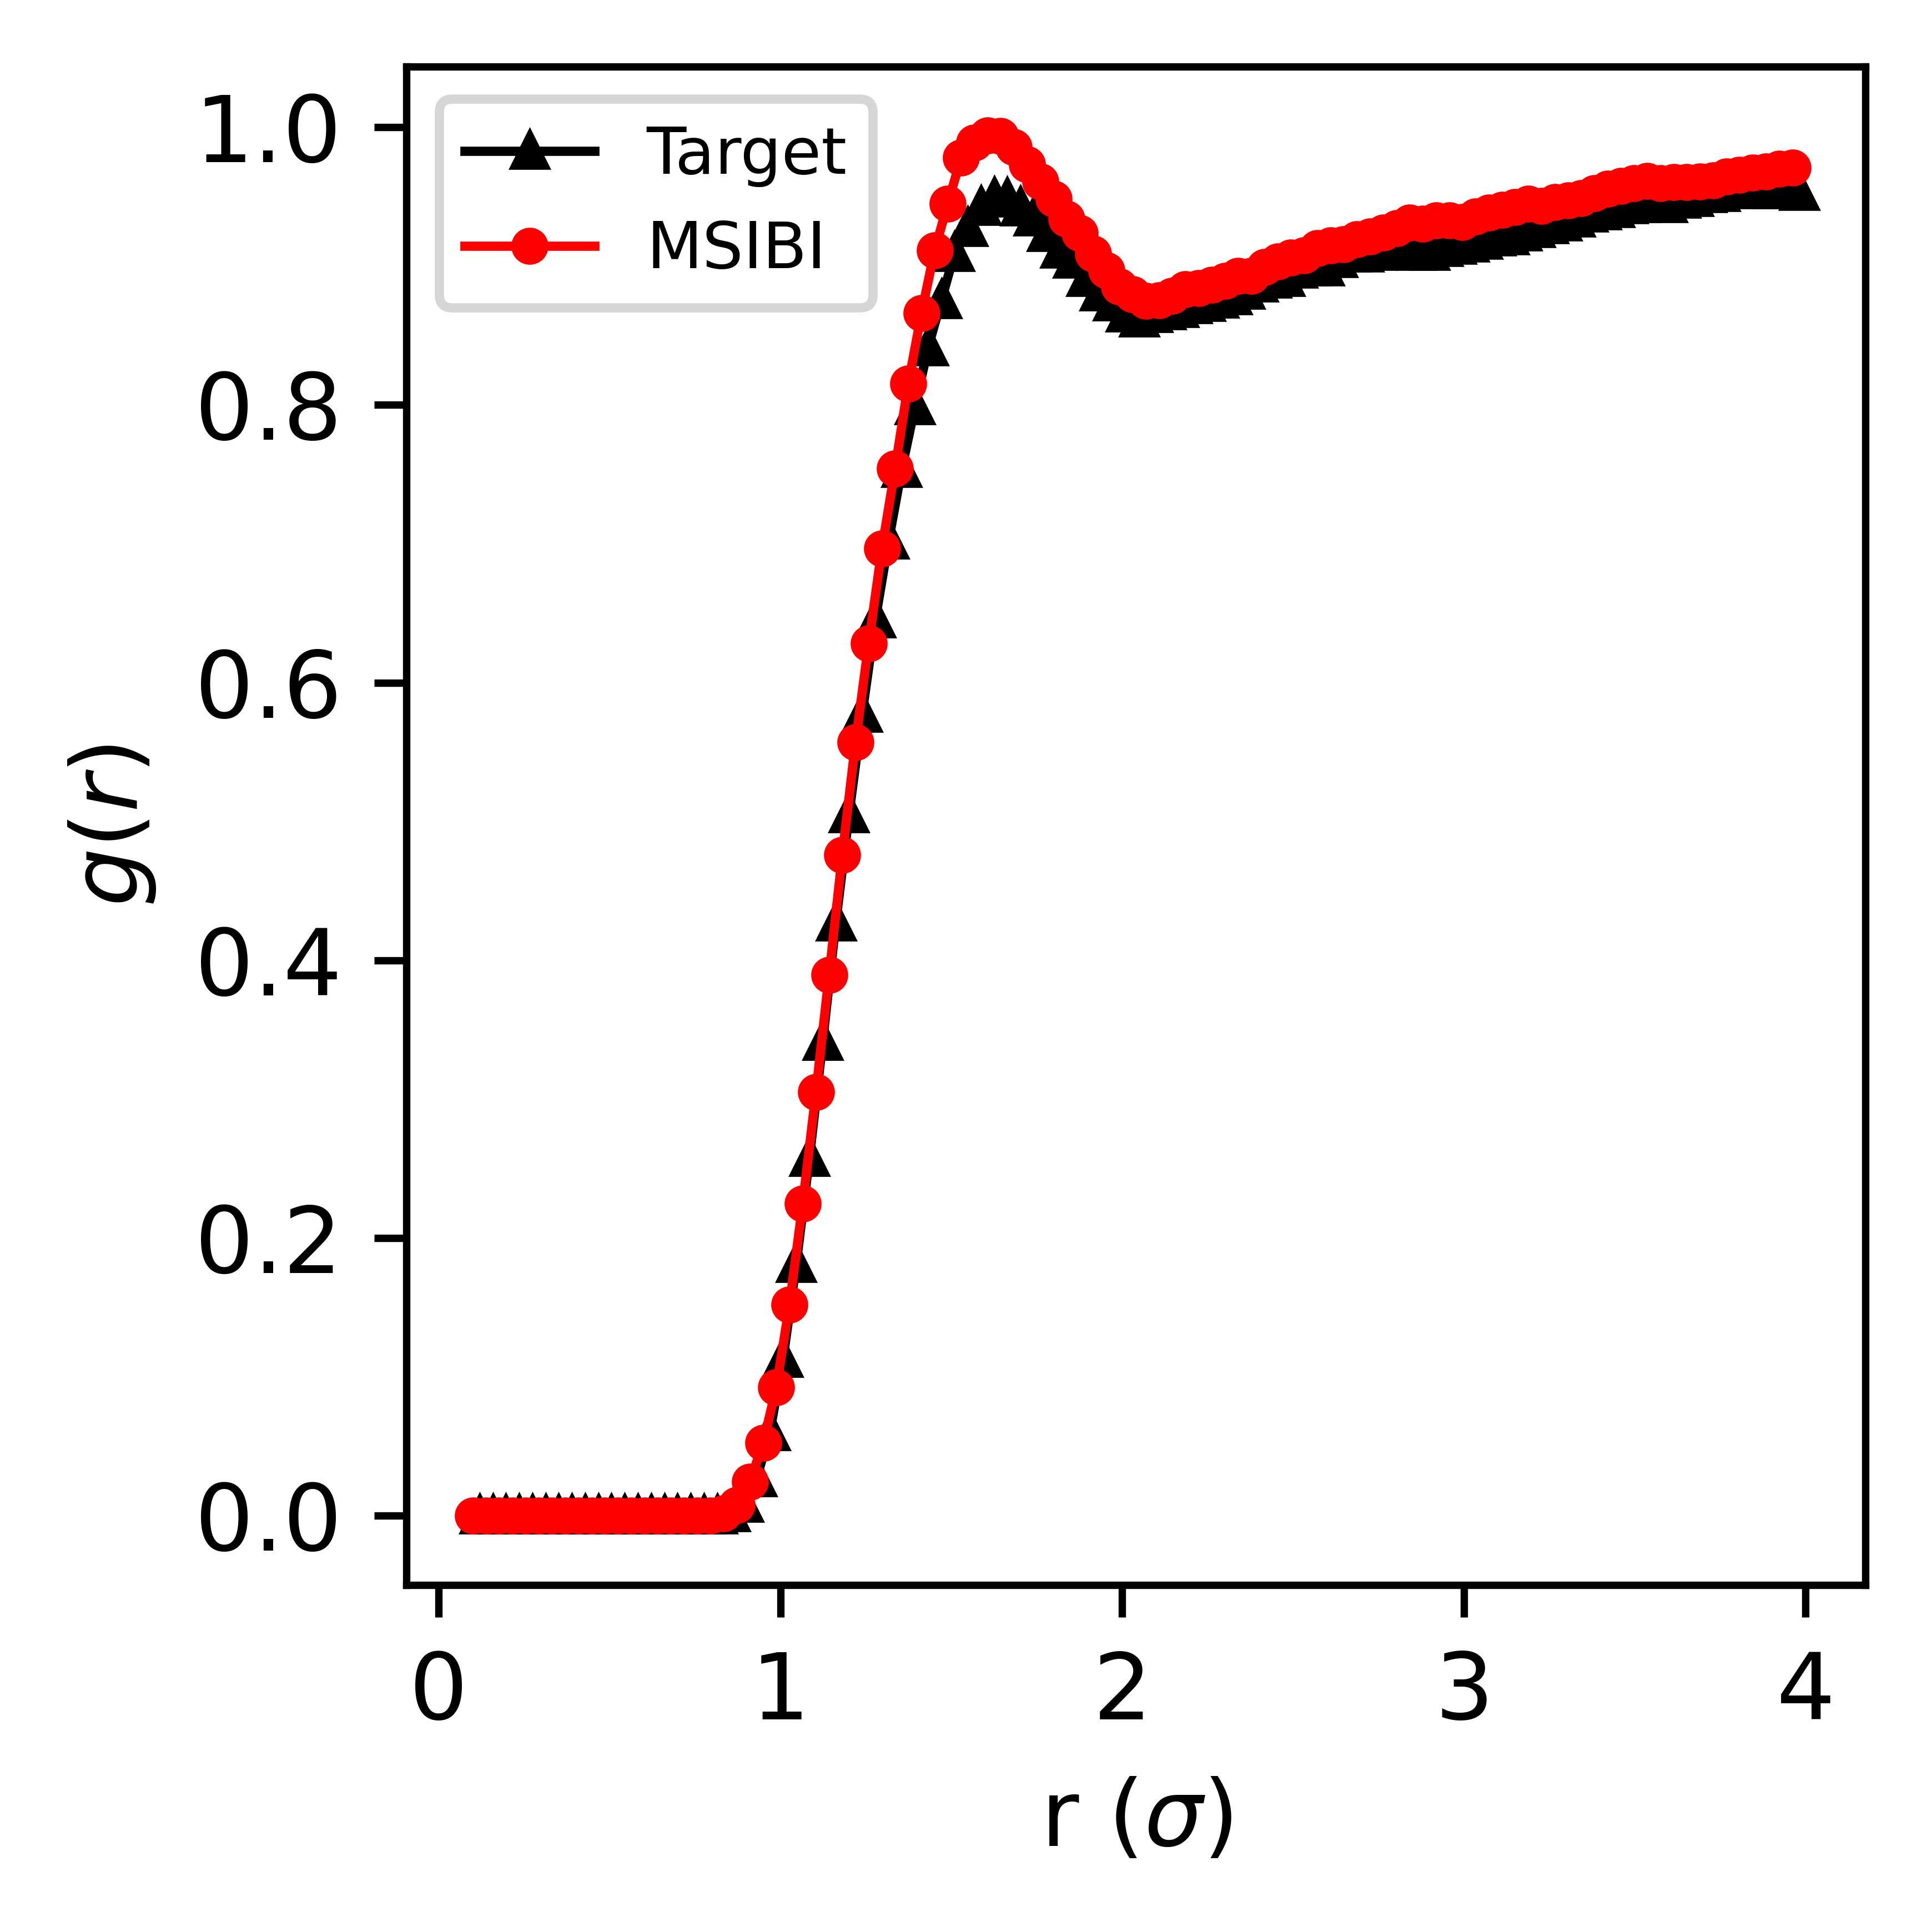

In [14]:
state_name = "Tg"
tg_state = np.load(job.fn("state_AmorphousTg_pair_A-A_data.npz"))
dist = tg_state["distribution_history"][iteration]
target_dist = tg_state["target_distribution"]

plt.plot(target_dist[:,0], target_dist[:,1], color="k", marker="^", label="Target")
plt.plot(dist[:,0], dist[:,1], color="r", marker="o", label="MSIBI")

plt.legend(loc="upper left")
plt.xlabel("r $(\sigma)$")
plt.ylabel("$g(r)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig(f"../../FIGS/msibi-rdf-match-{state_name}.png")
plt.show()

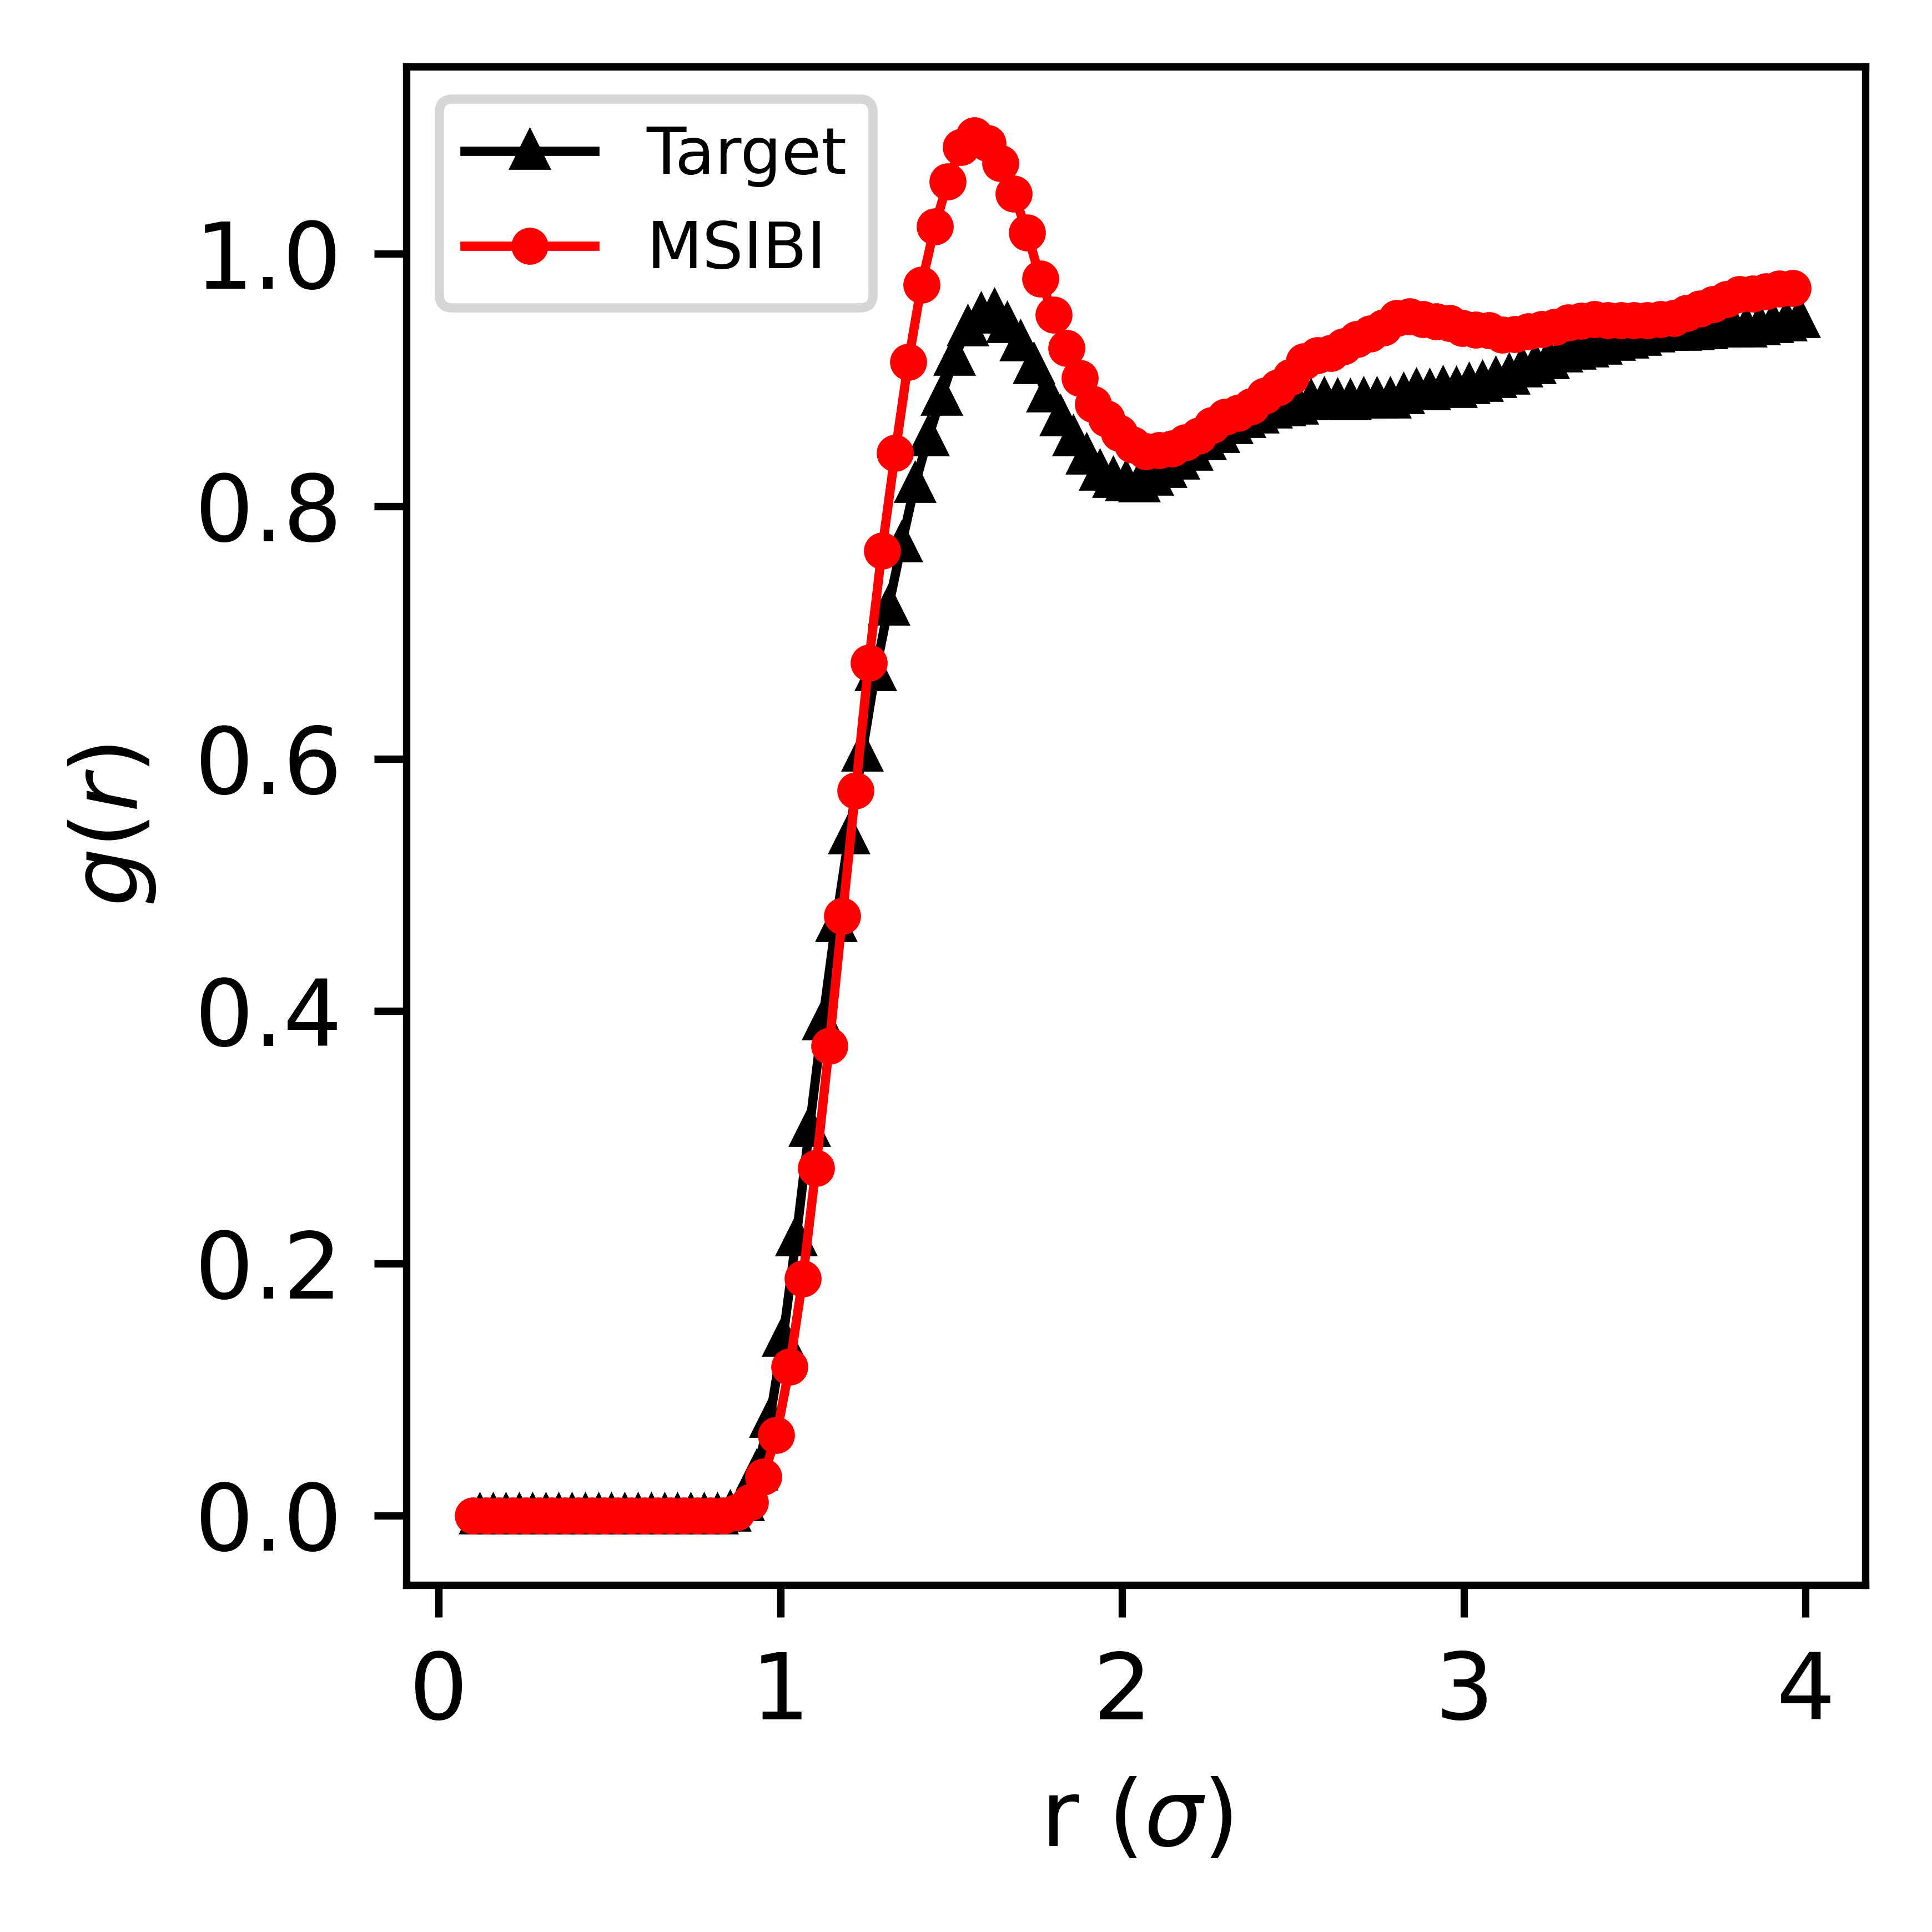

In [15]:
state_name = "below-Tg"
lowden_state = np.load(job.fn("state_BelowTg_pair_A-A_data.npz"))
dist = lowden_state["distribution_history"][iteration]
target_dist = lowden_state["target_distribution"]

plt.plot(target_dist[:,0], target_dist[:,1], color="k", marker="^", label="Target")
plt.plot(dist[:,0], dist[:,1], color="r", marker="o", label="MSIBI")

plt.legend(loc="upper left")
plt.xlabel("r $(\sigma)$")
plt.ylabel("$g(r)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig(f"../../FIGS/msibi-rdf-match-{state_name}.png")
plt.show()

In [47]:
lowden_state = np.load(job.fn("state_LowDen_pair_A-A_data.npz"))
dist = lowden_state["distribution_history"][iteration]
target_dist = lowden_state["target_distribution"]
plt.plot(dist[:,0], dist[:,1])
plt.plot(target_dist[:,0], target_dist[:,1], "k--")

FileNotFoundError: [Errno 2] No such file or directory: '/home/erjank_project/PPS-MSIBI/pps-msibi/msibi-flow/pair-flow-3-states-unordered/workspace/b4289482ca51d698463f1c62717db7d8/state_LowDen_pair_A-A_data.npz'

# Second Iterations:

In [17]:
bond_project = signac.get_project("../../msibi-flow/bond-flow-with-pairs/")
angle_project = signac.get_project("../../msibi-flow/angle-flow-with-pairs/")

## Bond Results

### Plotting Final Potentials:

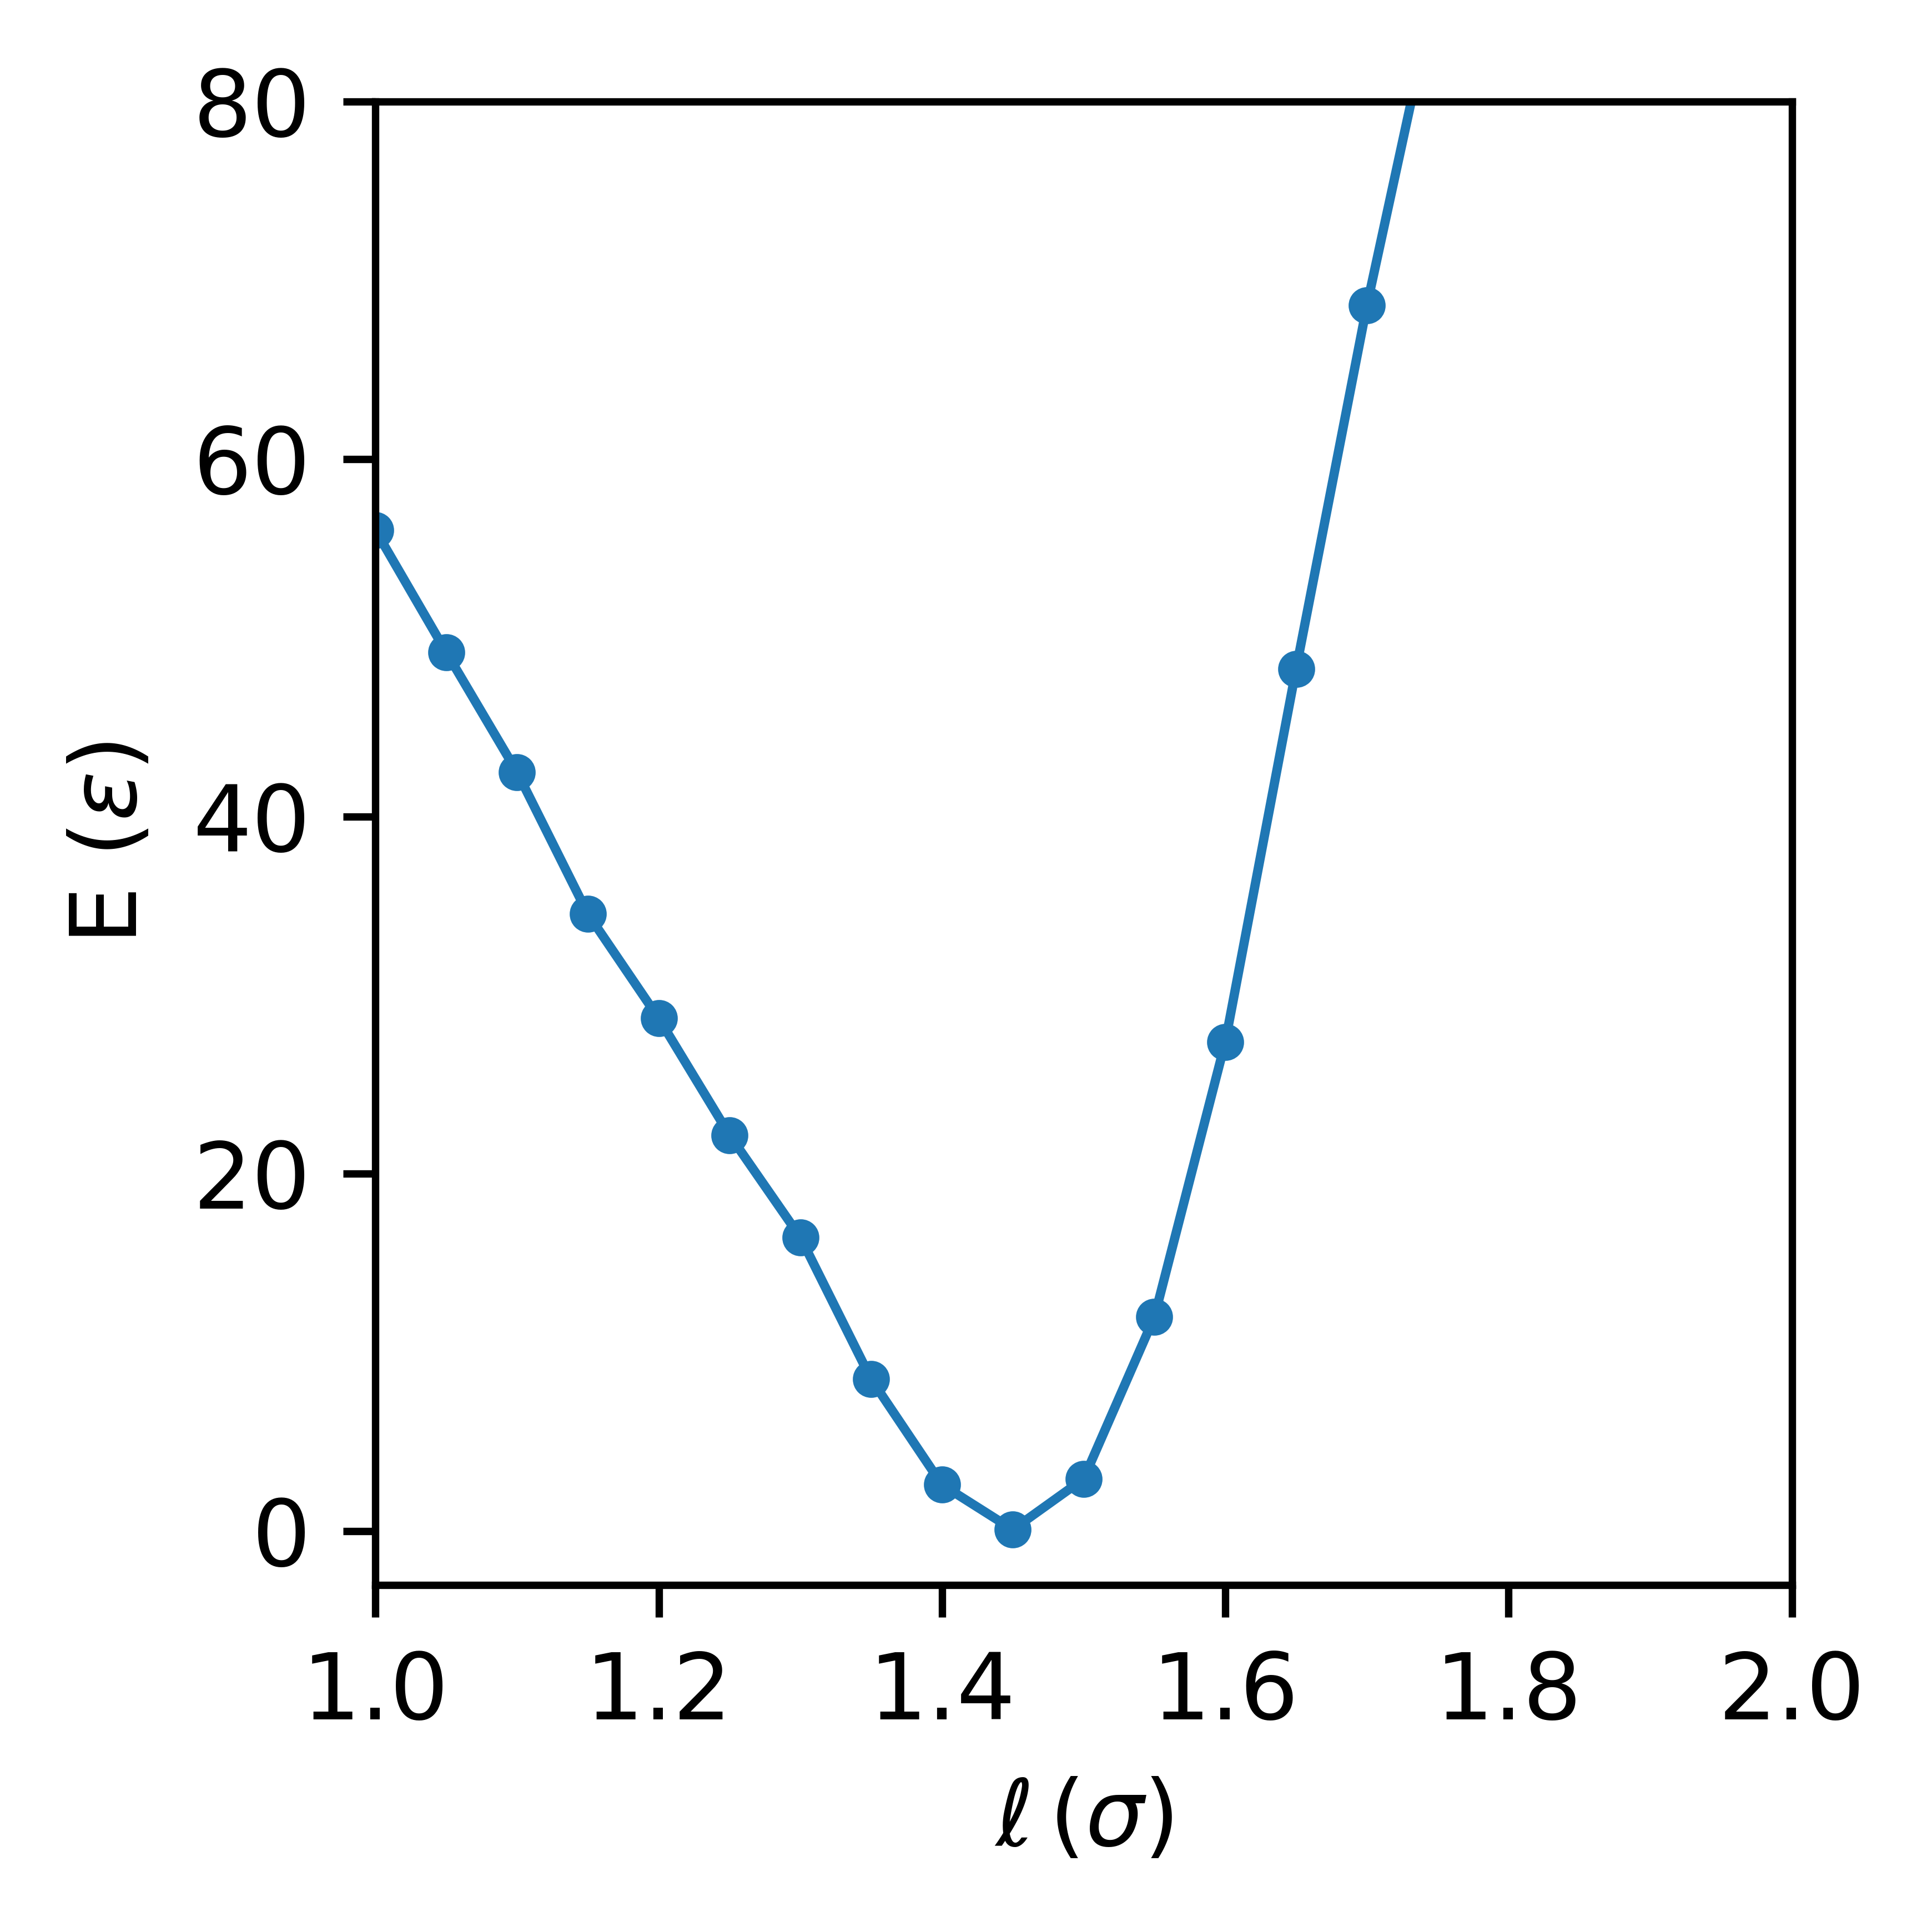

In [18]:
fig = plt.figure()
for job in bond_project:
    final_pot = np.genfromtxt(job.fn("A-A_bond.csv"), names=True, delimiter=",")
    plt.plot(final_pot["x"], final_pot["potential"], marker="o")

plt.xlim(1, 2)
plt.ylim(-3, 80)
plt.xlabel("$\ell\,(\sigma)$")
plt.ylabel("E $(\epsilon)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig("../../FIGS/msibi-bond-potential.png")
plt.show()

In [109]:
def harmonic_bond(l, k, l0):
    return 0.5 * k * ( (l-l0)**2 )

from scipy.optimize import curve_fit

1777.6428720310723 1.4226084037500966


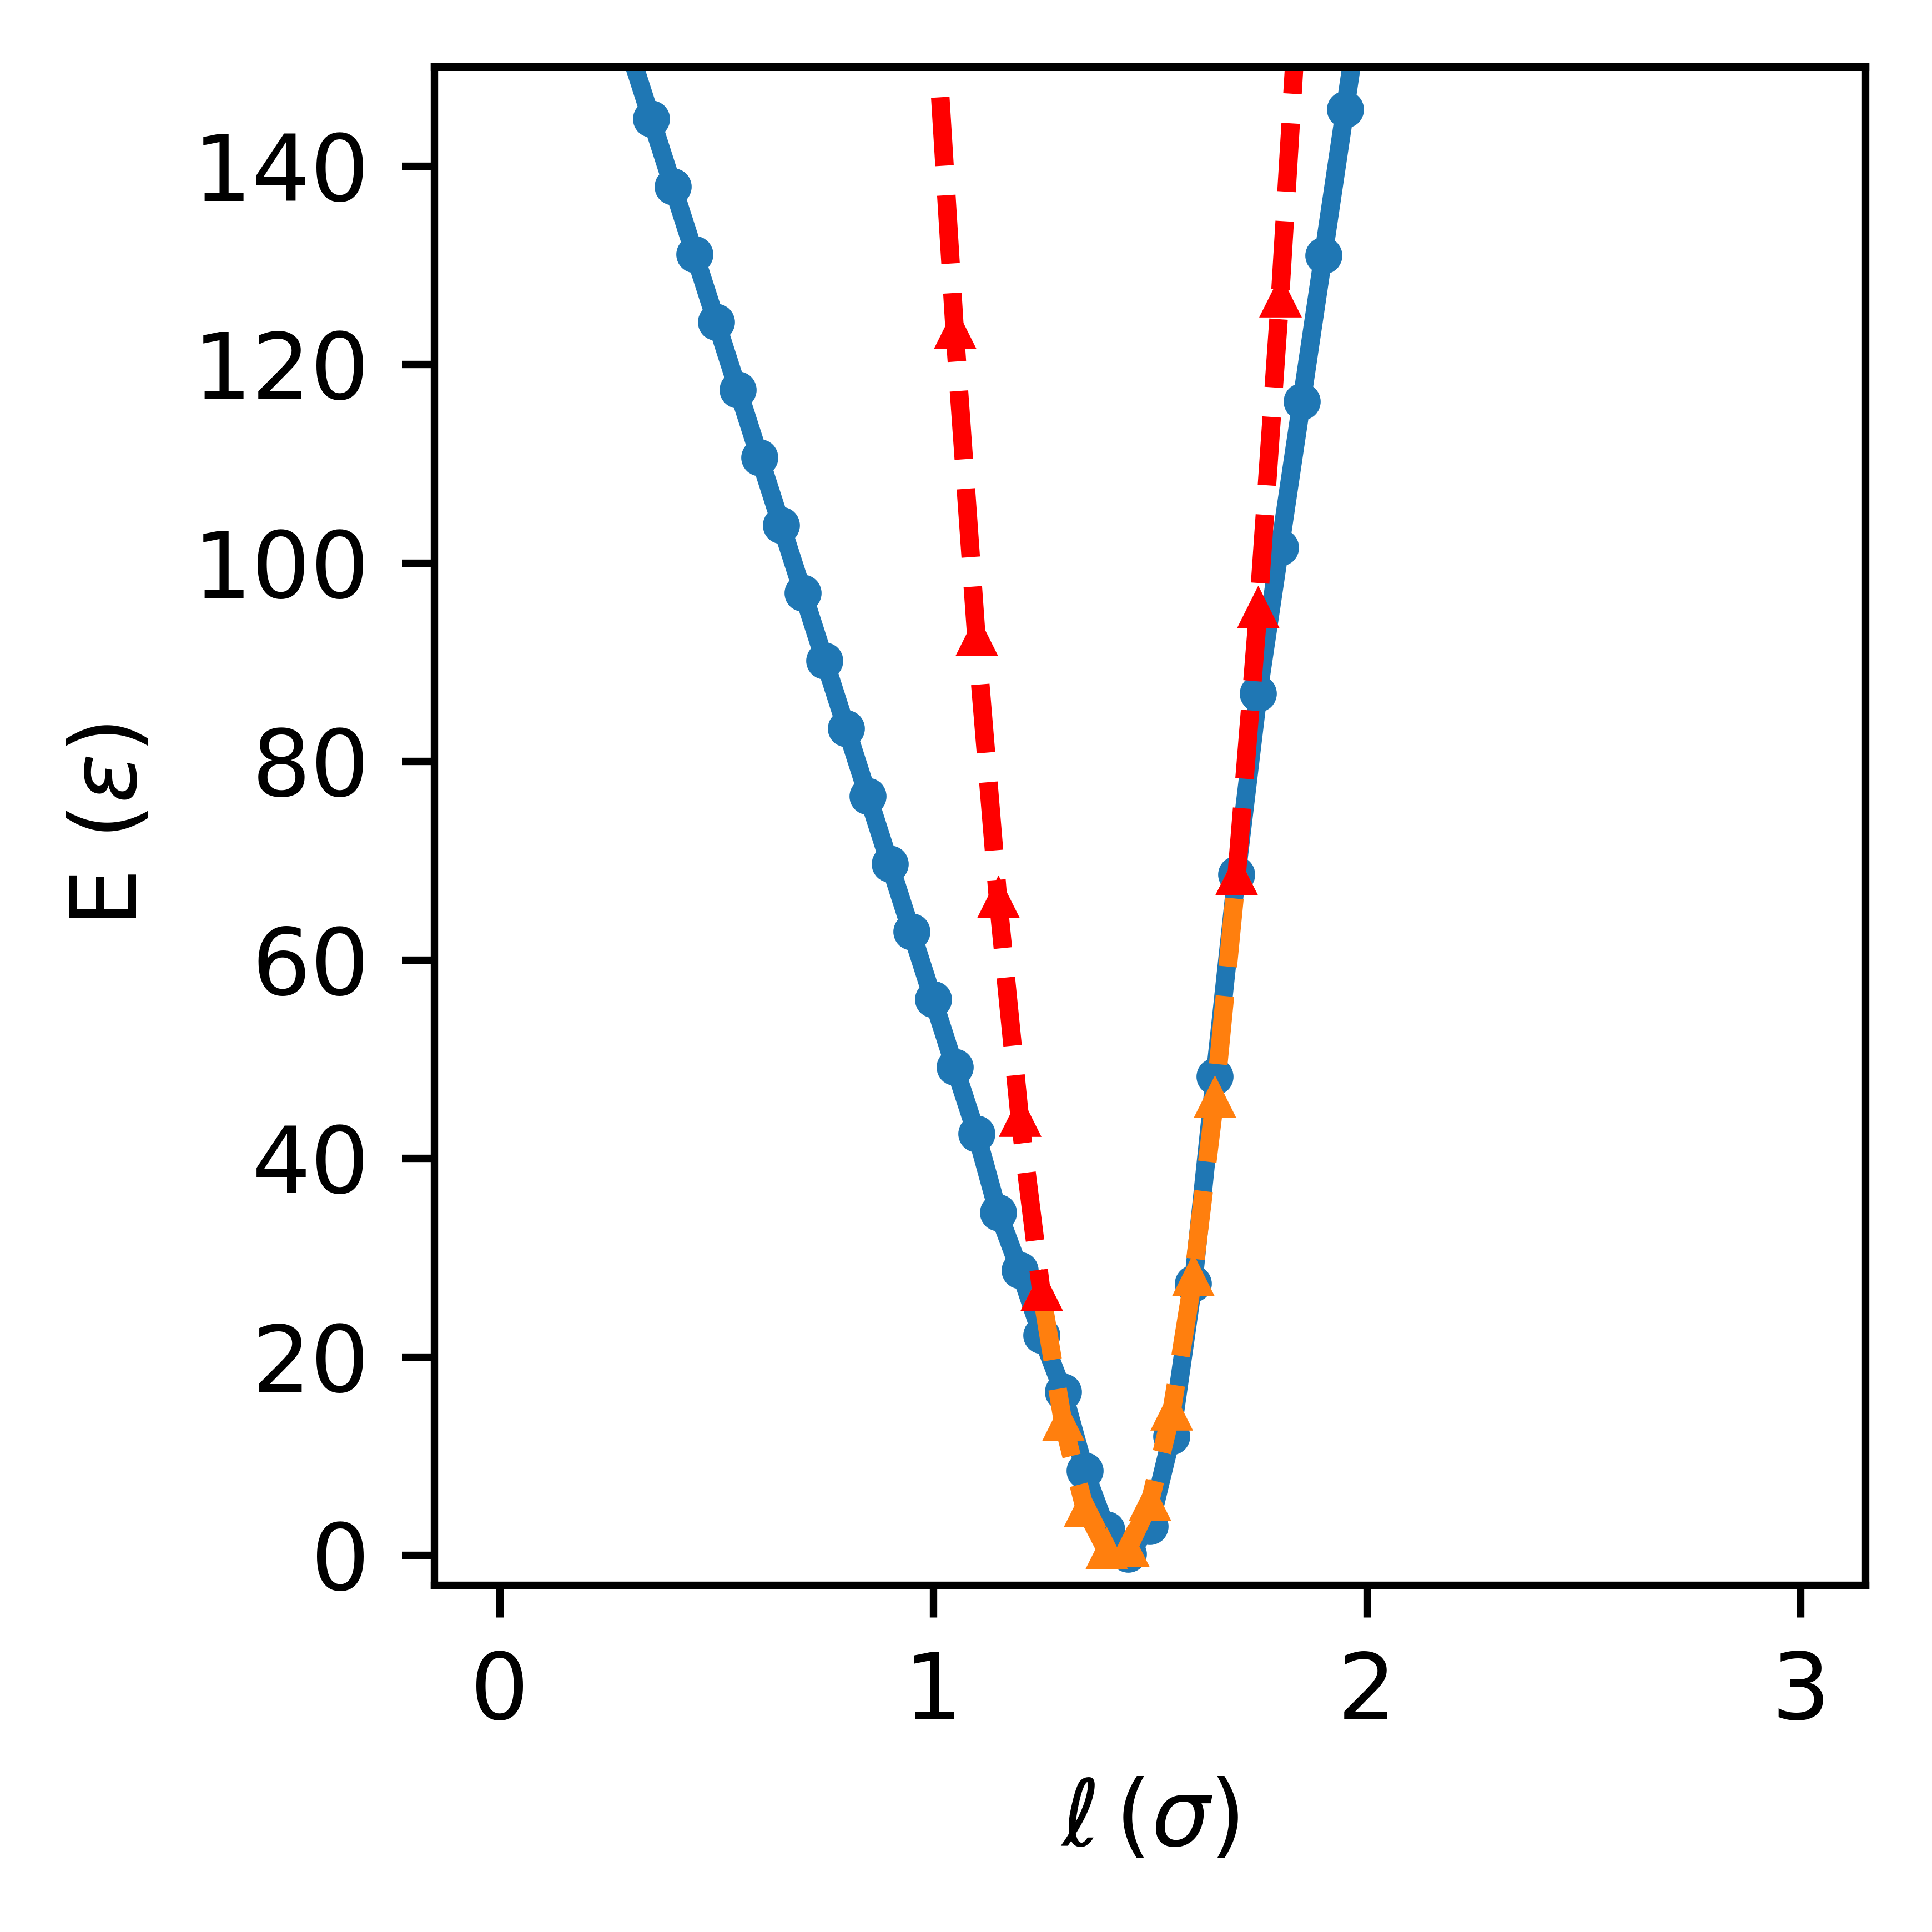

In [144]:
fig = plt.figure()
start = 25
end = 35
for job in bond_project:
    final_pot = np.genfromtxt(job.fn("A-A_bond.csv"), names=True, delimiter=",")
    plt.plot(final_pot["x"], final_pot["potential"], marker="o")

    initial_guess = (800, 1.45)
    
    popt, pcov = curve_fit(
        harmonic_bond,
        final_pot["x"][start:end],
        final_pot["potential"][start:end],
        p0=initial_guess
    )

    k_fit, l0_fit = popt
    plt.plot(
        final_pot["x"][start:end],
        harmonic_bond(final_pot["x"][start:end], k_fit, l0_fit),
        label="fit",
        linestyle="--",
        marker="^"
    )
    
    plt.plot(
        final_pot["x"][:start+1],
        harmonic_bond(final_pot["x"][:start+1], k_fit, l0_fit),
        label="fit",
        linestyle="--",
        marker="^",
        color="red"
    )
    
    plt.plot(
        final_pot["x"][end - 1:],
        harmonic_bond(final_pot["x"][end - 1:], k_fit, l0_fit),
        label="fit",
        linestyle="--",
        marker="^",
        color="red"
    )

print(k_fit, l0_fit)

#plt.xlim(1, 2)
plt.ylim(-3, 150)
plt.xlabel("$\ell\,(\sigma)$")
plt.ylabel("E $(\epsilon)$")
plt.tight_layout()

### Plotting Bond Distributions

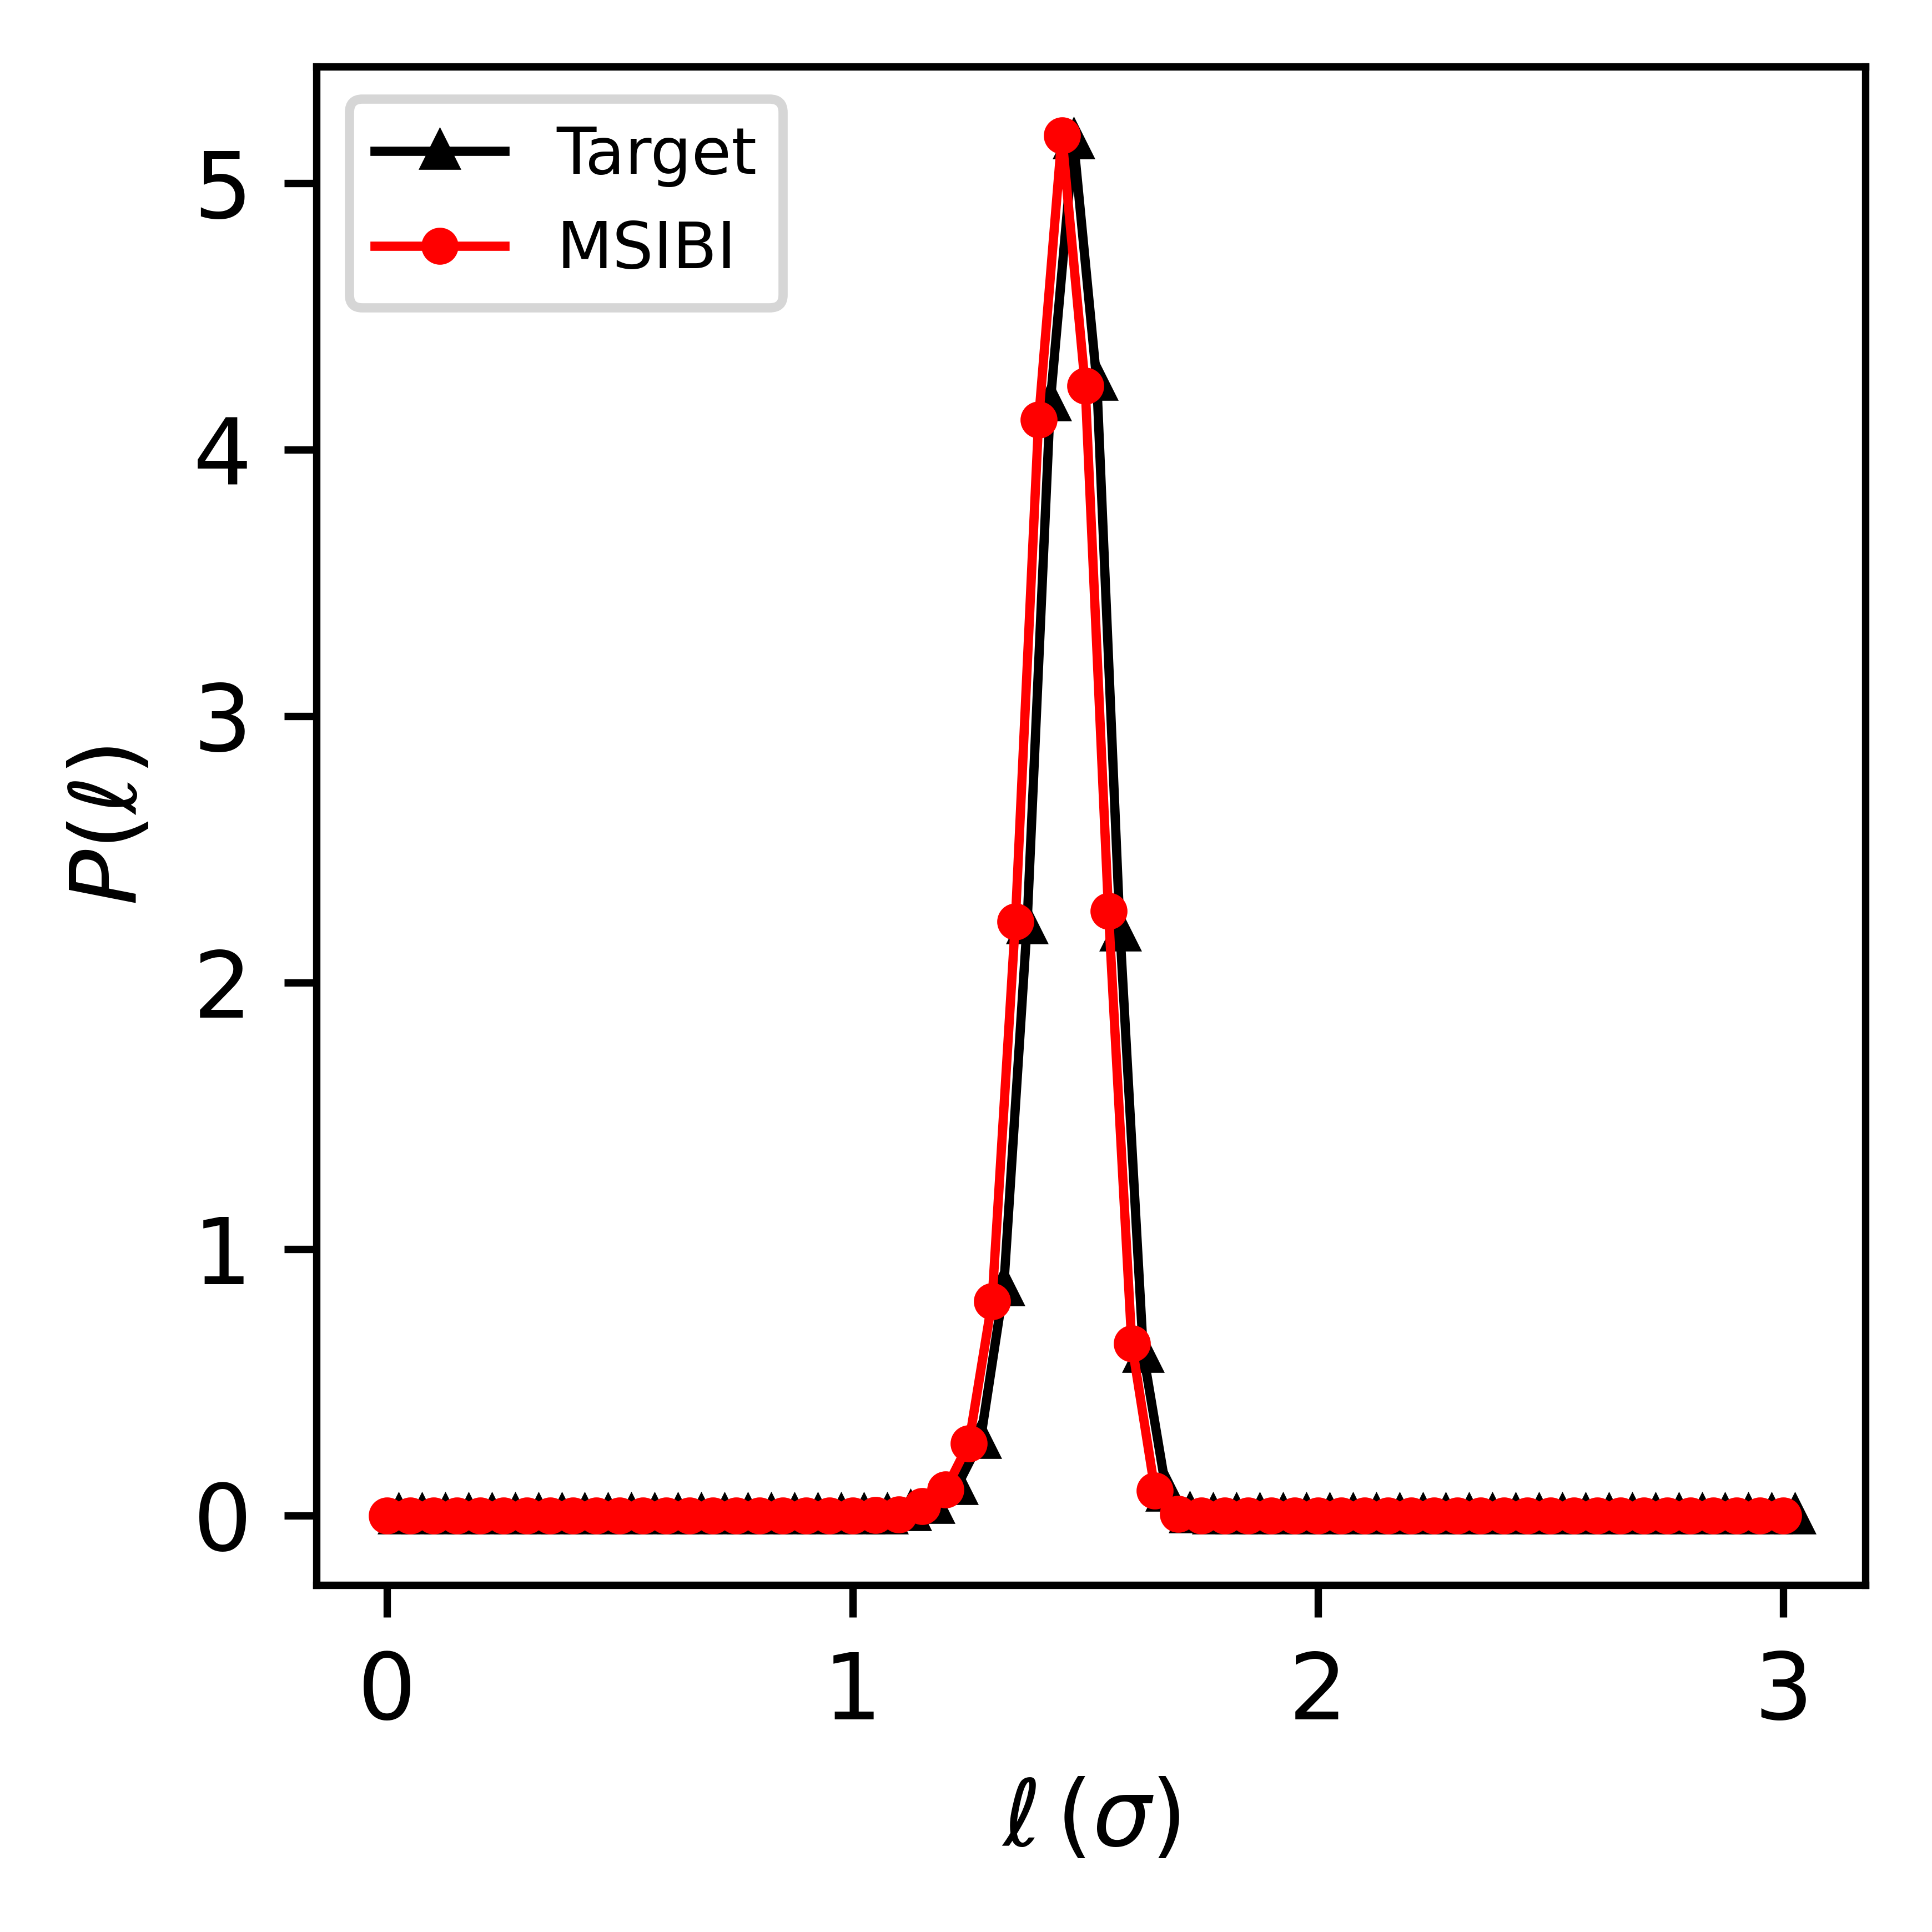

In [19]:
fig = plt.figure()
for job in bond_project:
    state = np.load(job.fn("state_A_bond_A-A_data.npz"))
    target = state["target_distribution"]
    msibi = state["current_distribution"]
    
    plt.plot(target[:,0], target[:,1], label="Target", color="k", marker="^")
    plt.plot(msibi[:,0], msibi[:,1], label="MSIBI", color="r", marker="o")

plt.legend(loc="upper left")
plt.xlabel("$\ell\,(\sigma)$")
plt.ylabel("$P(\ell)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig(f"../../FIGS/msibi-bond-match.png")
plt.show()

## Angle Results

### Plotting Final Potentials:

34c9e9f8fa7d942743adbf6835395671


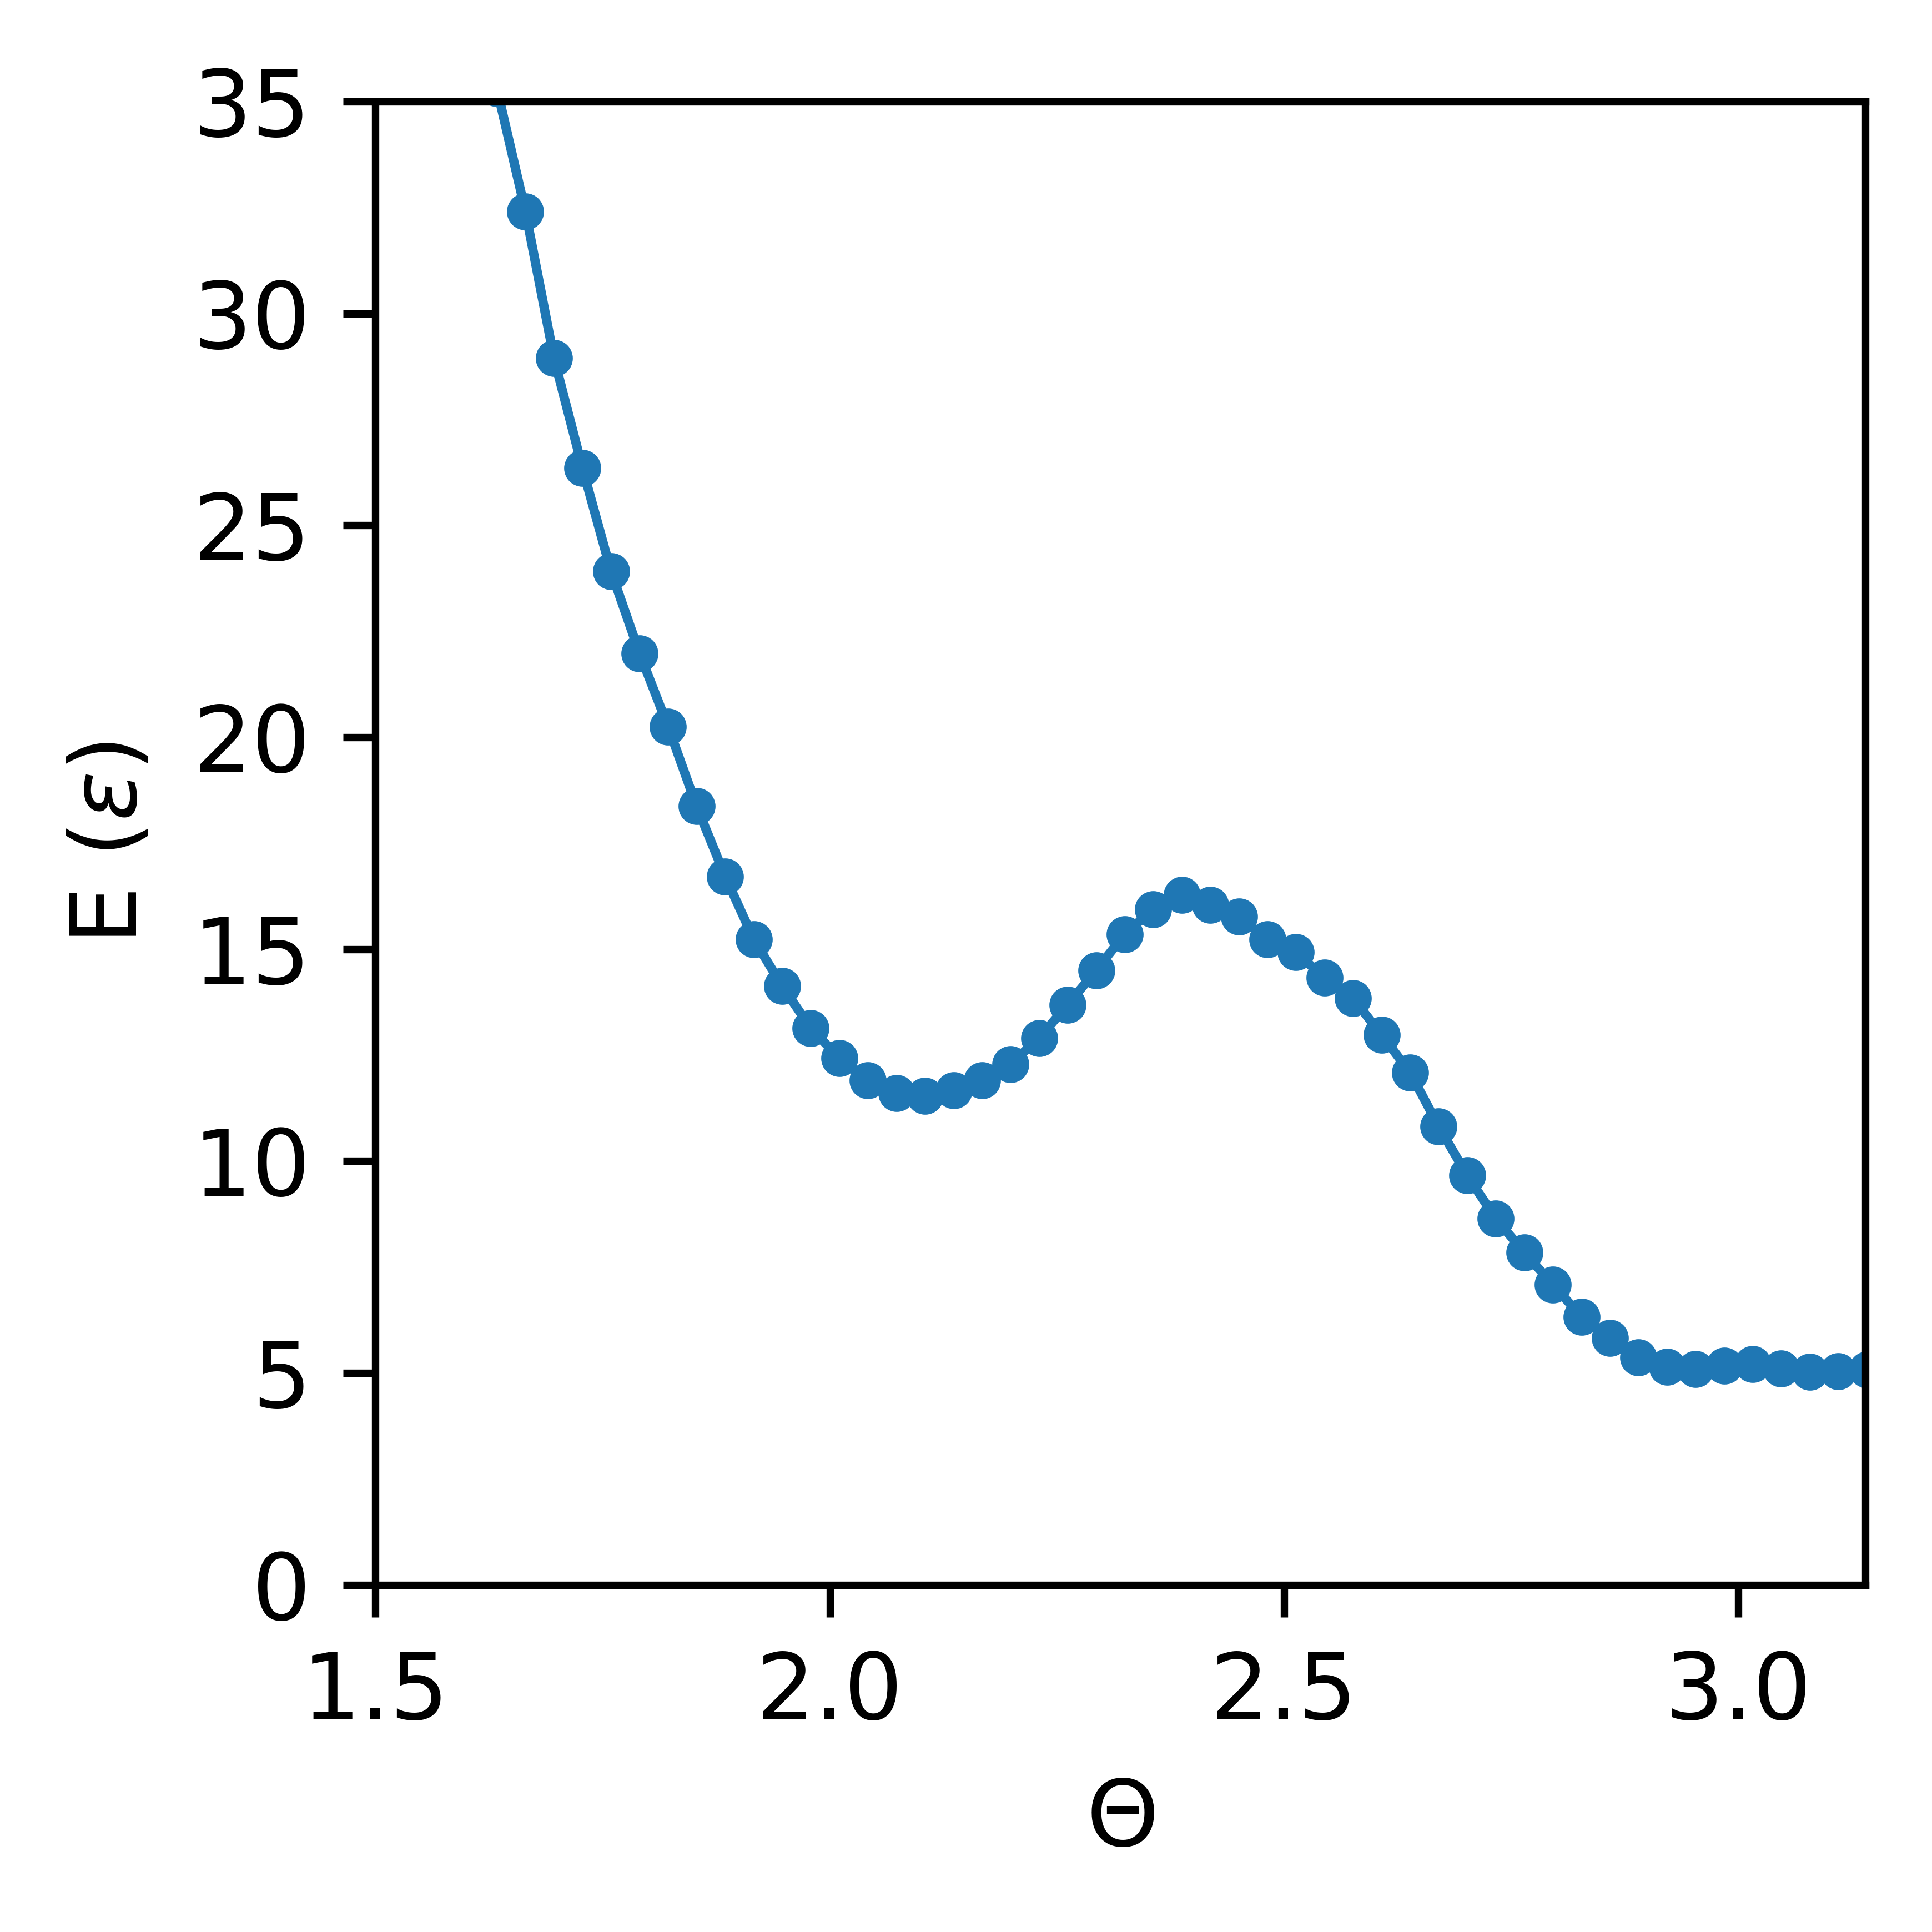

In [20]:
fig = plt.figure()
for job in angle_project:
    print(job.id)
    final_pot = np.genfromtxt(job.fn("A-A-A_angle.csv"), names=True, delimiter=",")
    smoothed = savitzky_golay(y=final_pot["potential"], window_size=5, order=1)
    plt.plot(final_pot["x"], smoothed, marker="o")

plt.xlim(1.5, 3.14)
plt.ylim(0, 35)
plt.xlabel("$\Theta$")
plt.ylabel("E $(\epsilon)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig("../../FIGS/msibi-angle-potential.png")
plt.show()

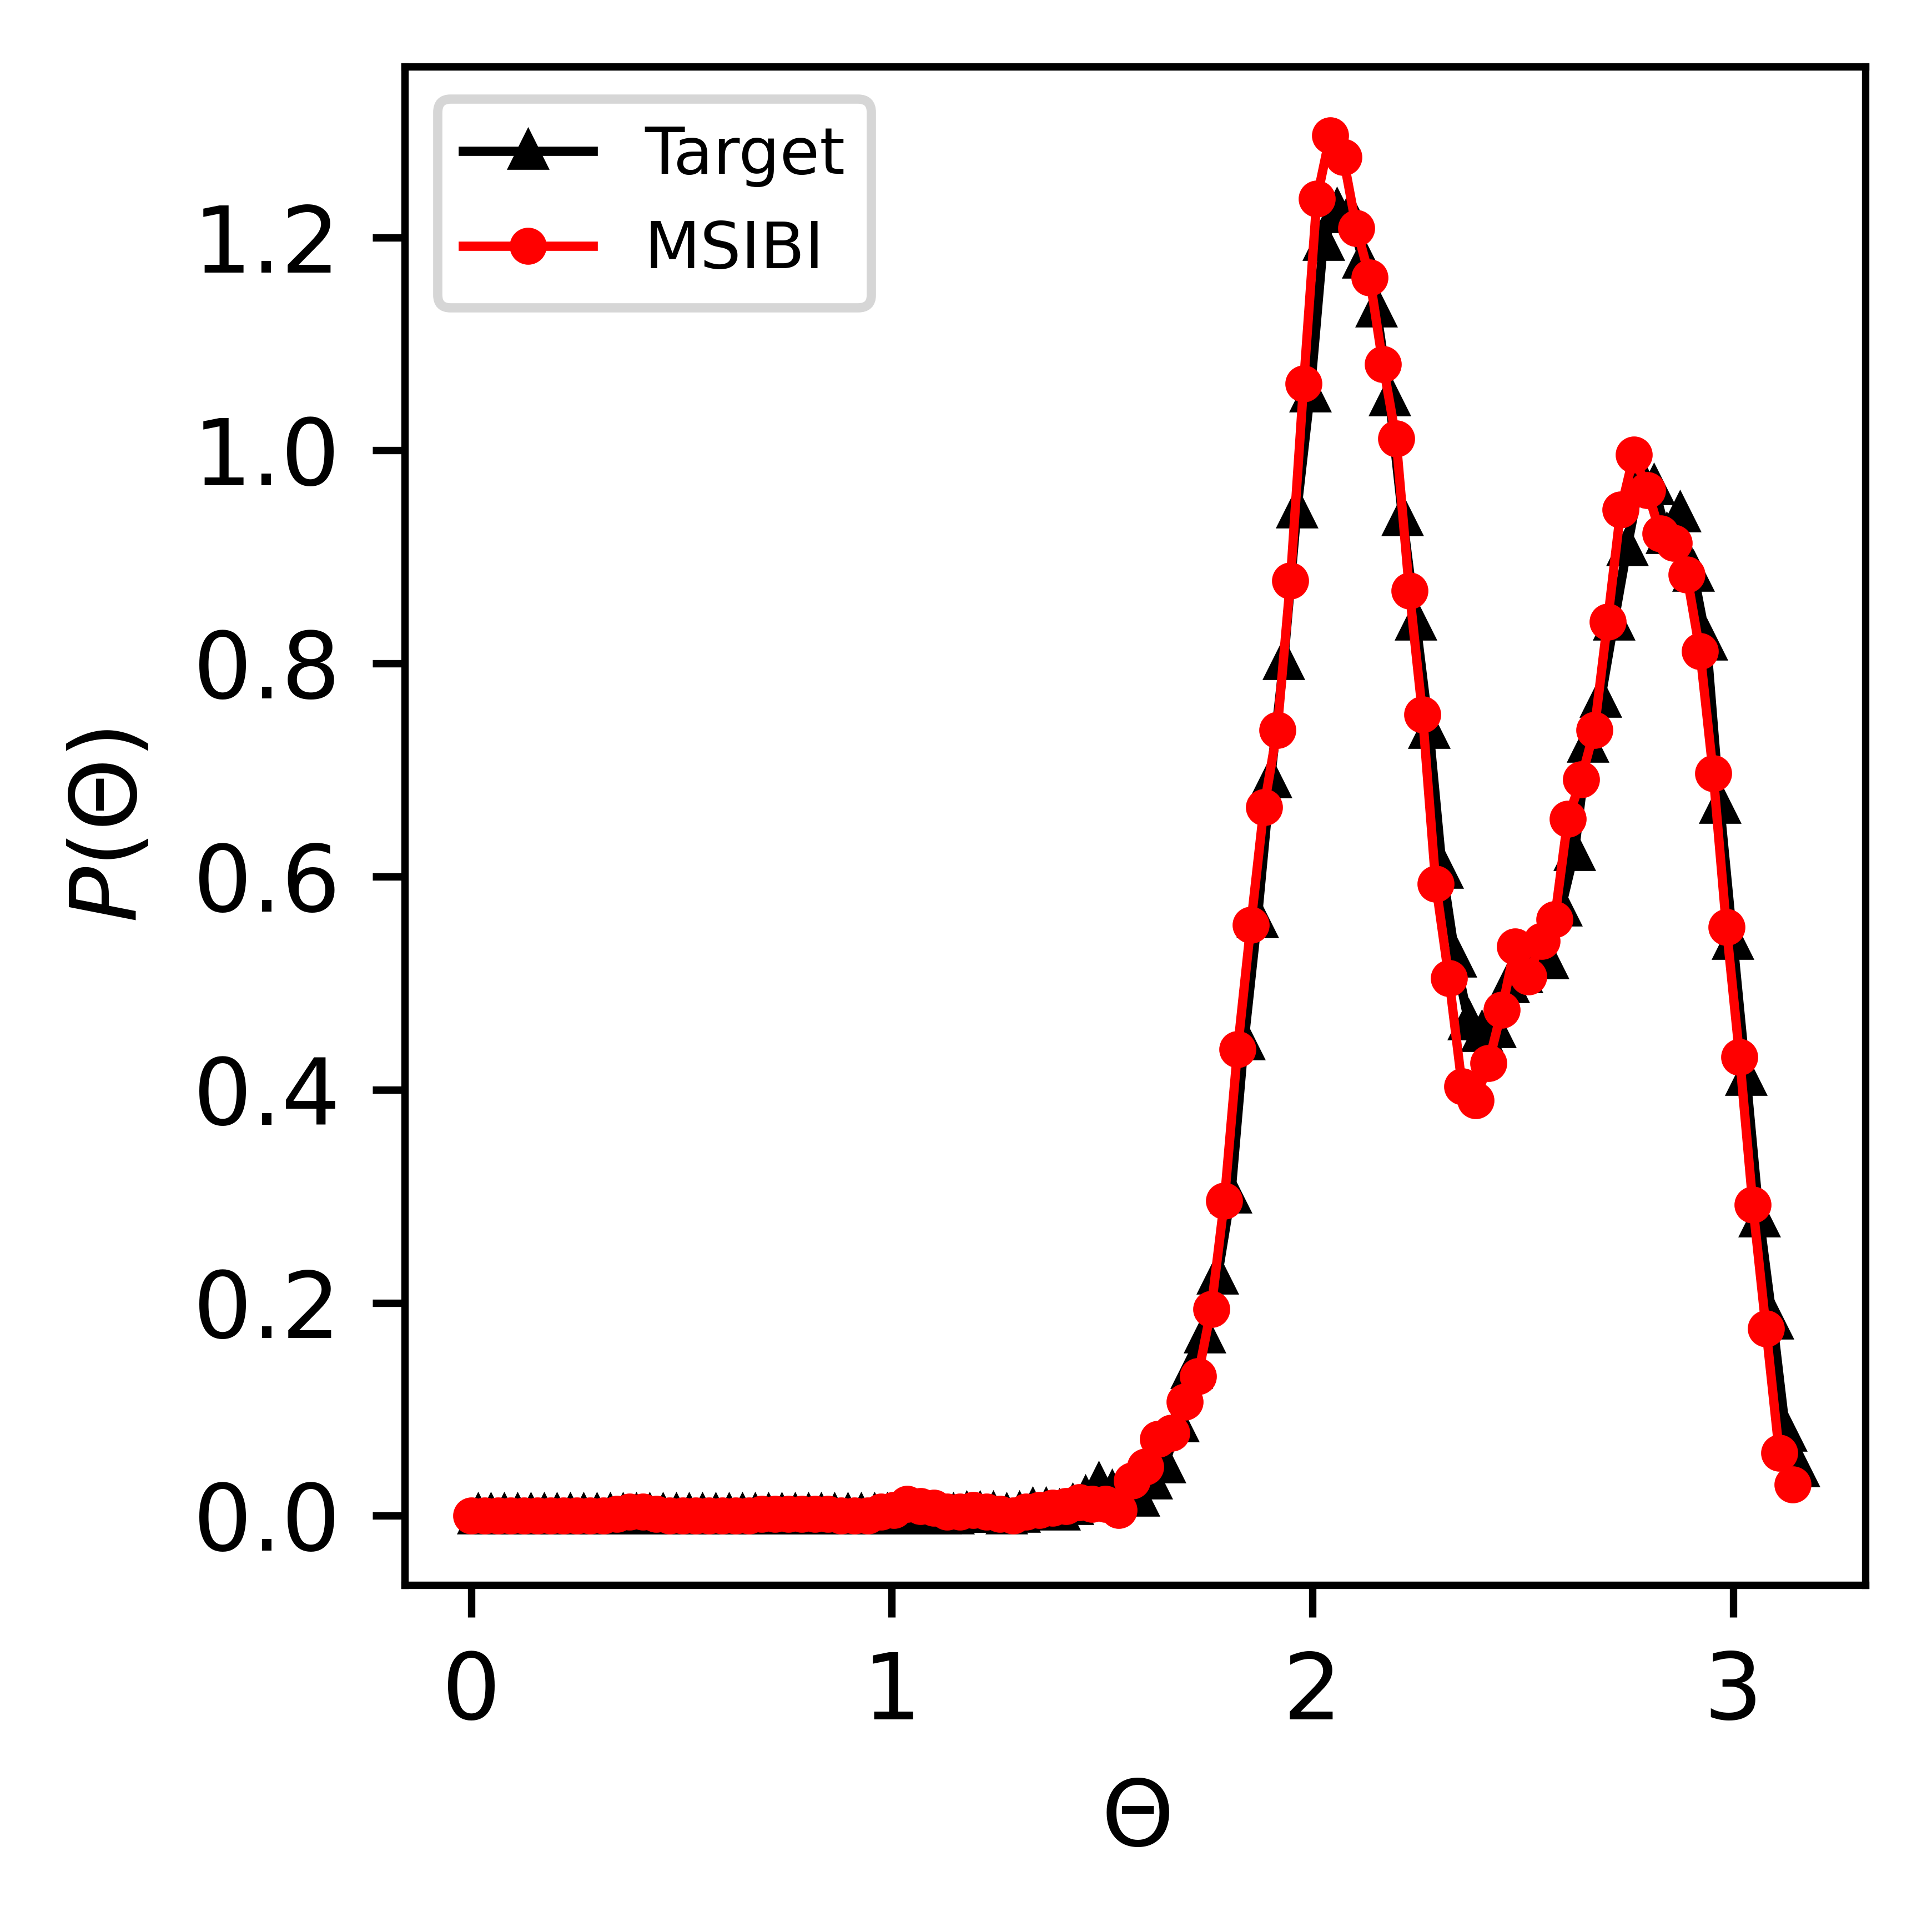

In [21]:
fig = plt.figure()
for job in angle_project:
    state = np.load(job.fn("state_A_angle_A-A-A_data.npz"))
    target = state["target_distribution"]
    msibi = state["current_distribution"]
    
    plt.plot(target[:,0], target[:,1], label="Target", color="k", marker="^")
    plt.plot(msibi[:,0], msibi[:,1], label="MSIBI", color="r", marker="o")
    
plt.legend(loc="upper left")
plt.xlabel("$\Theta$")
plt.ylabel("$P(\Theta)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig(f"../../FIGS/msibi-angle-match.png")
plt.show()

# Testing fit when using Harmonic Bonds

In [5]:
single_chain_project = signac.get_project("../../testing-model/single-chains/")

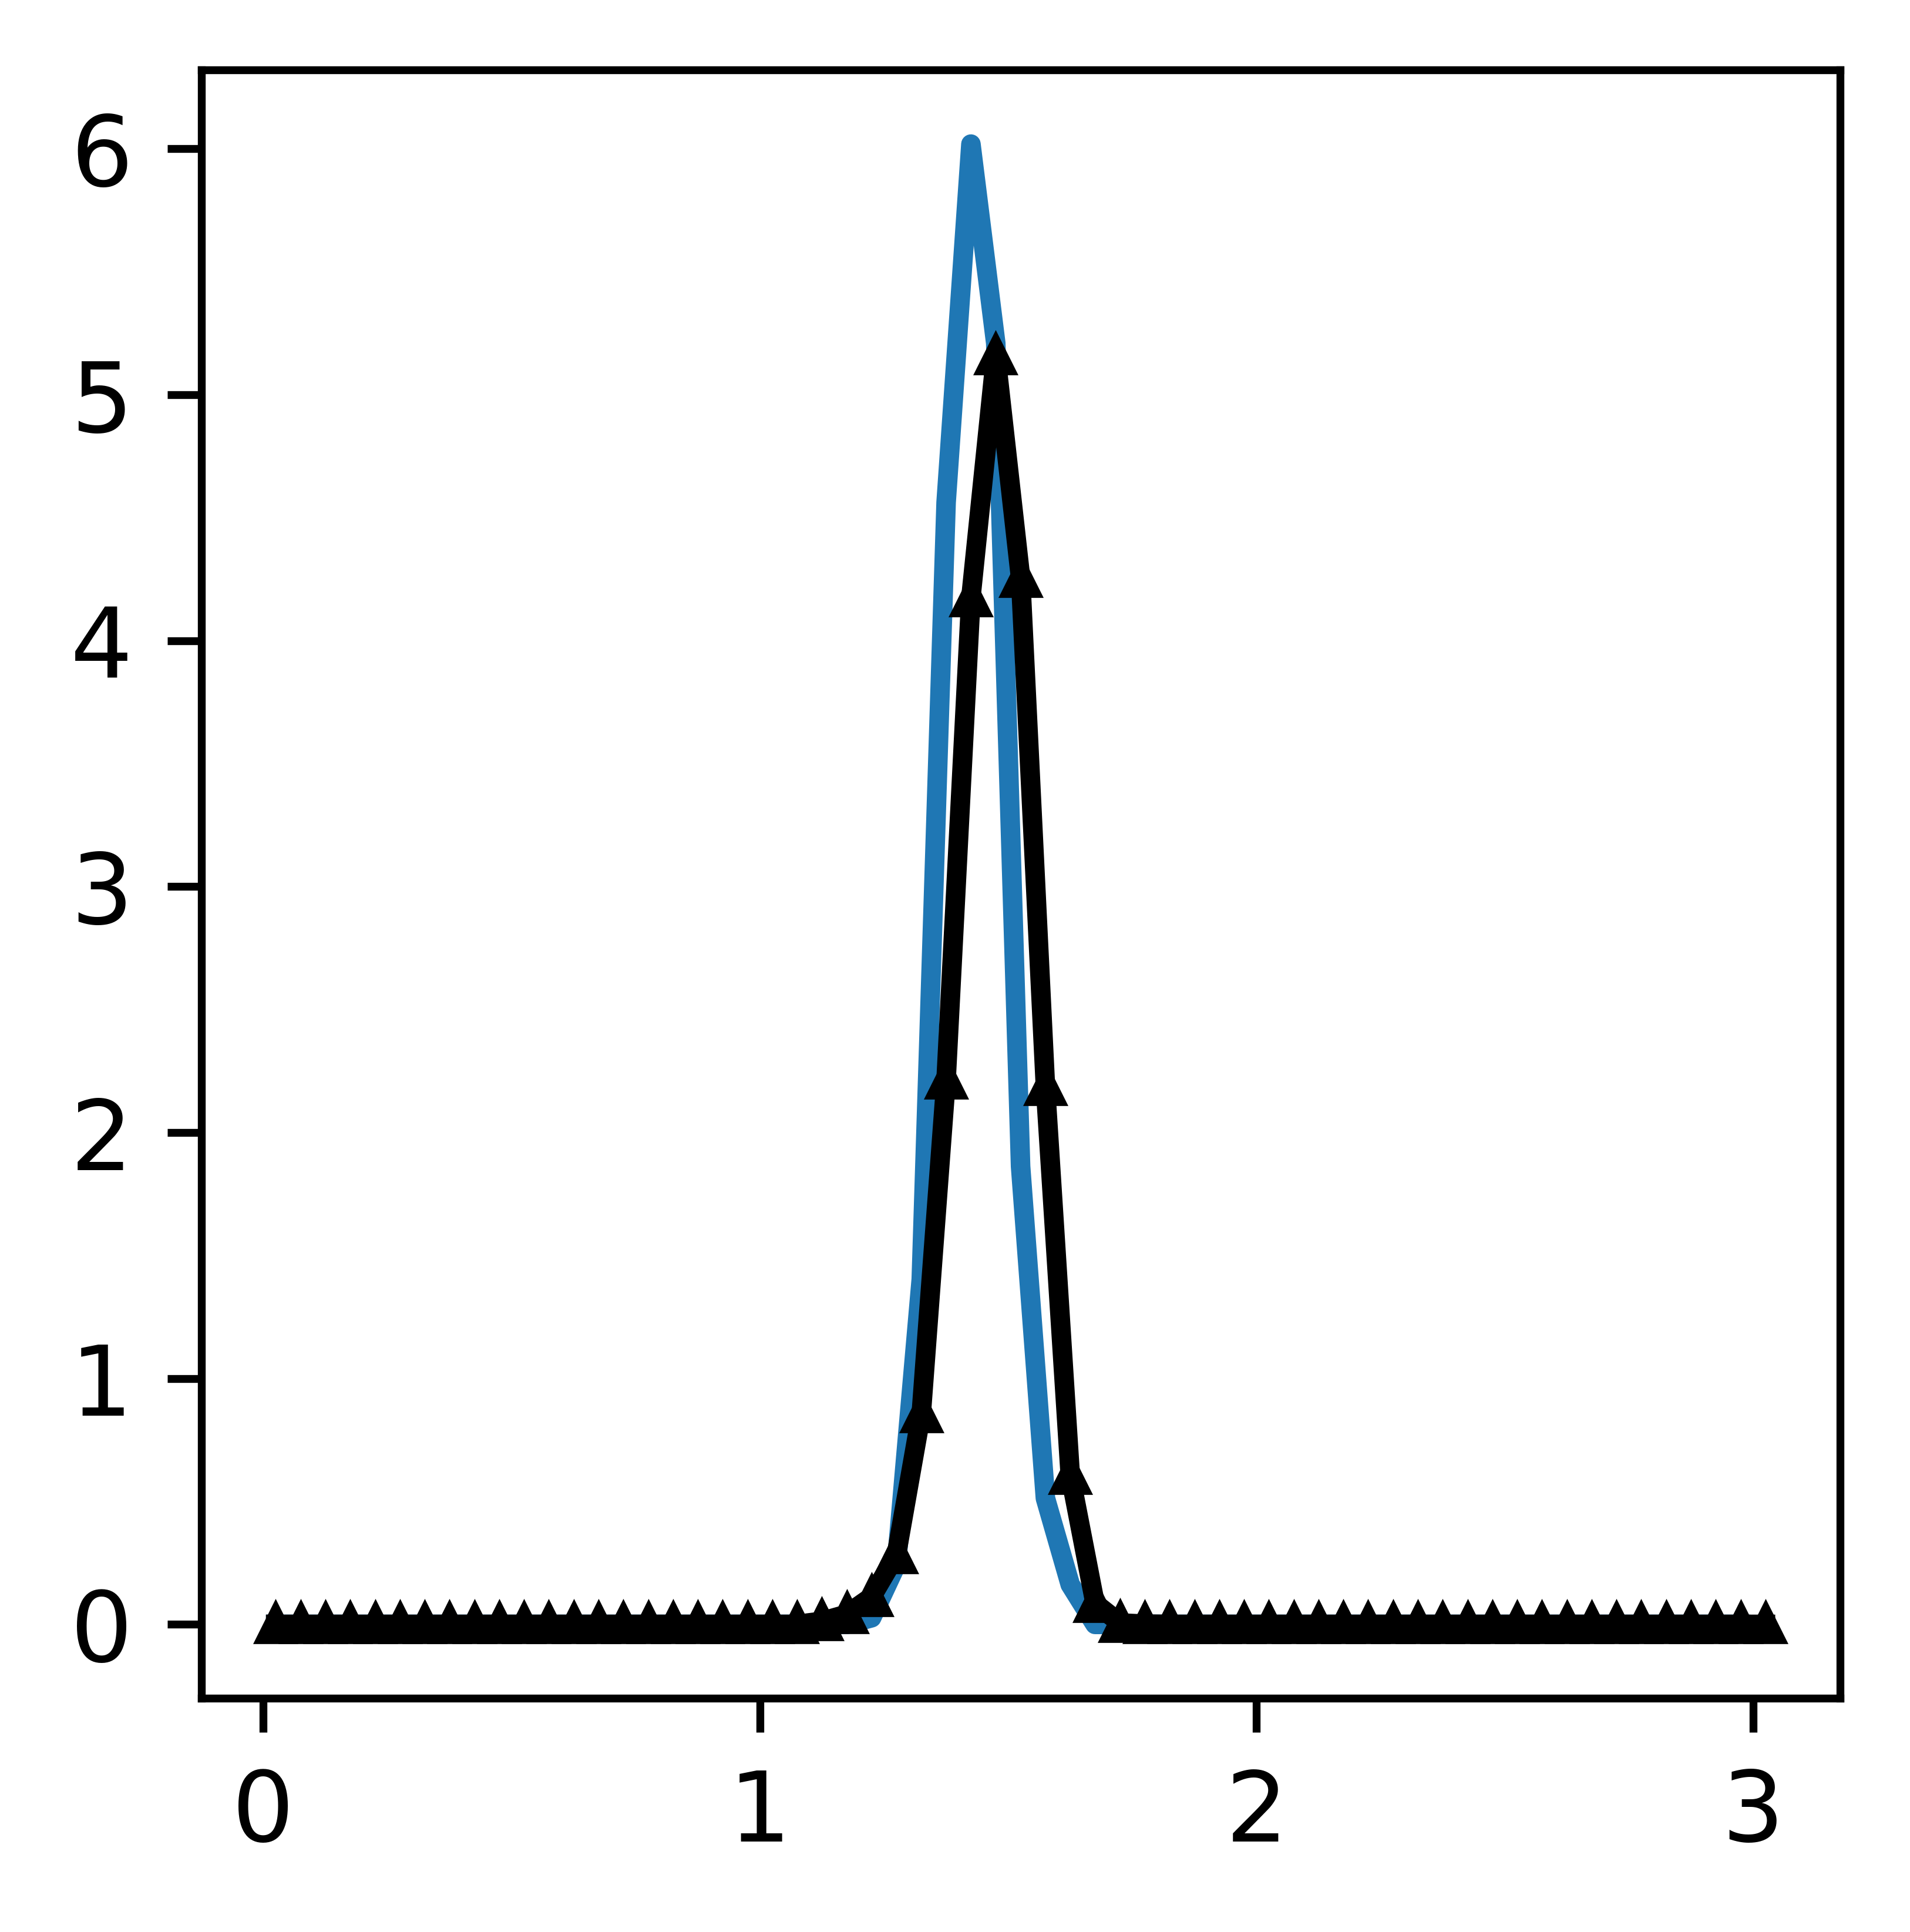

In [18]:
for job in single_chain_project.find_jobs(
    {"harmonic_bonds": True, "kT": 7.0, "lengths": 40}
):
    bdist = bond_distribution(
        gsd_file=job.fn("trajectory0.gsd"),
        A_name="A",
        B_name="A",
        start=-20,
        stop=-1,
        histogram=True,
        l_max=3.0,
        bins=60
    )
    plt.plot(bdist[:,0], bdist[:,1])

plt.plot(target[:,0], target[:,1], label="Target", color="k", marker="^")
    

# Looking at Bond Table potential

In [97]:
import pickle
pickle_path = job.fn("pps-msibi.pickle")

In [98]:
with open(pickle_path, "rb") as f:
    ff = pickle.load(f)

In [130]:
ff

In [129]:
ff.remove(ff[0])

In [102]:
exclu = pairs.nlist.exclusions

In [105]:
import hoomd

pairs.nlist = hoomd.md.nlist.Tree(
    buffer=0.40, exclusions=exclu
)

In [107]:
pairs.nlist.exclusions

_HOOMDList['bond', 'angle']

In [65]:
for param in bonds.params:
    print(param)

A-A


In [66]:
aa = bonds.params["A-A"]

In [74]:
r_range = np.arange(aa["r_min"], aa["r_max"], 0.05)

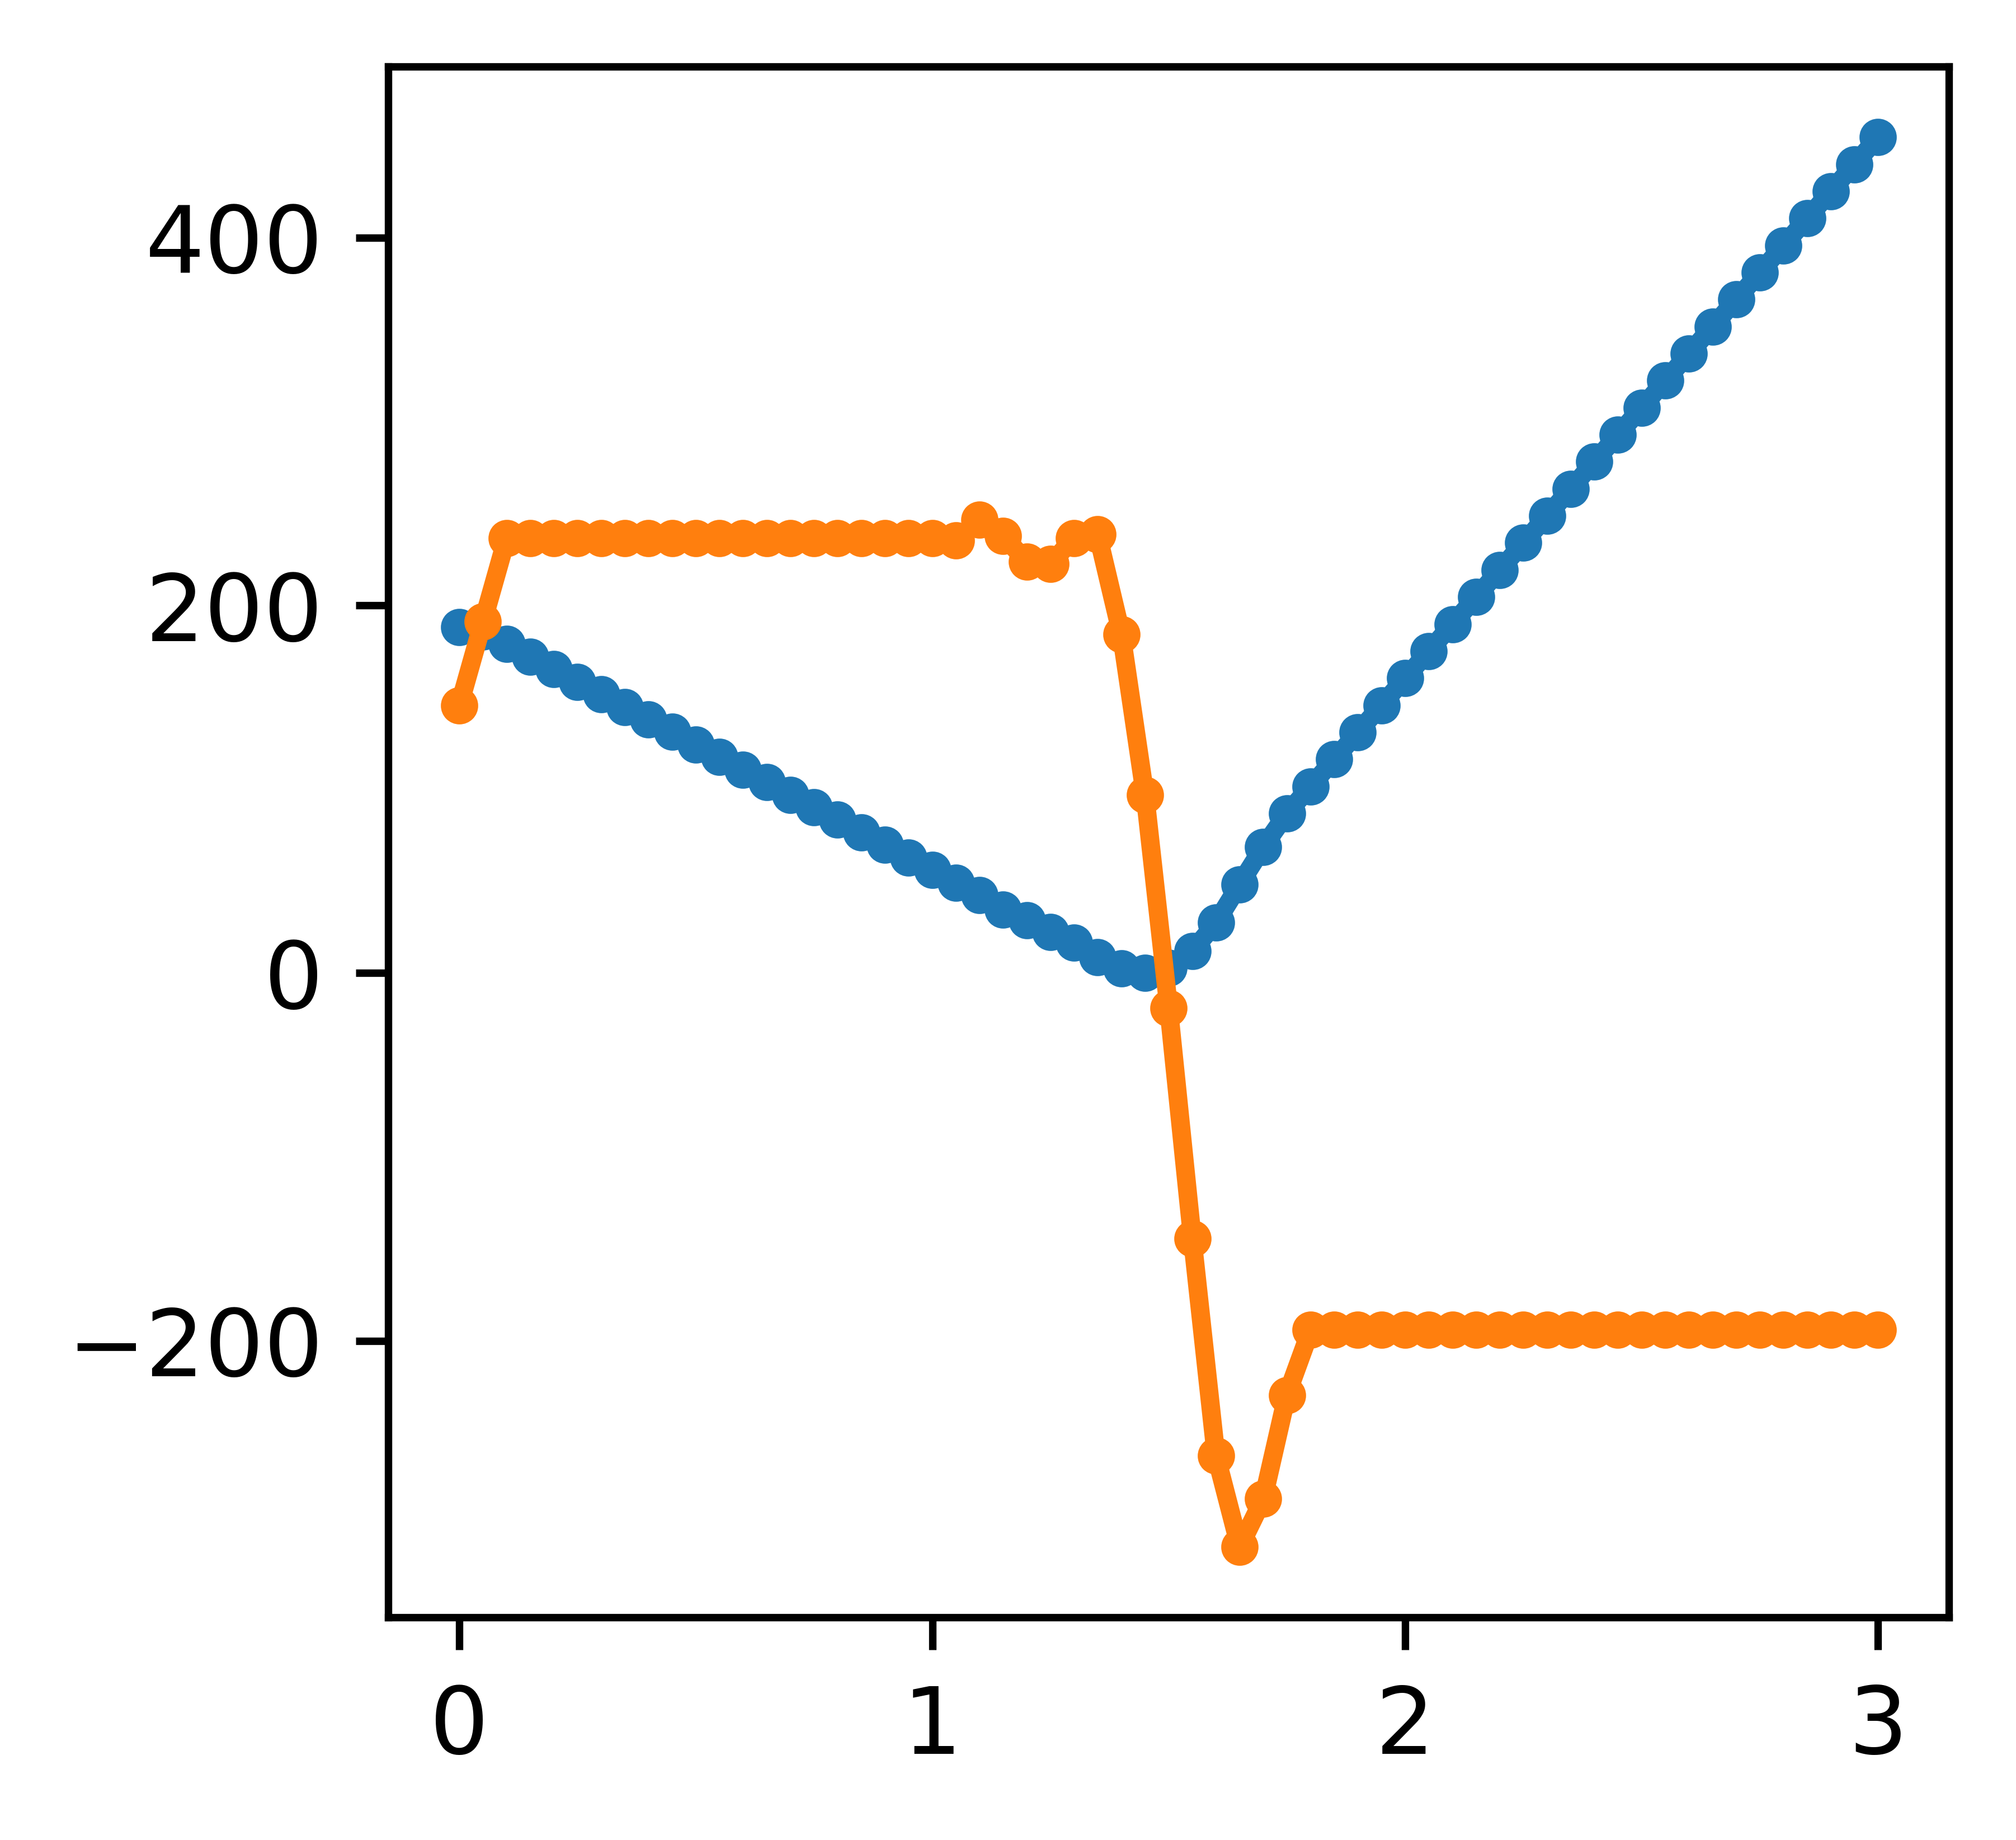

In [90]:
plt.plot(r_range, aa["U"], "o-")
plt.plot(r_range, aa["F"] + 100, "o-")

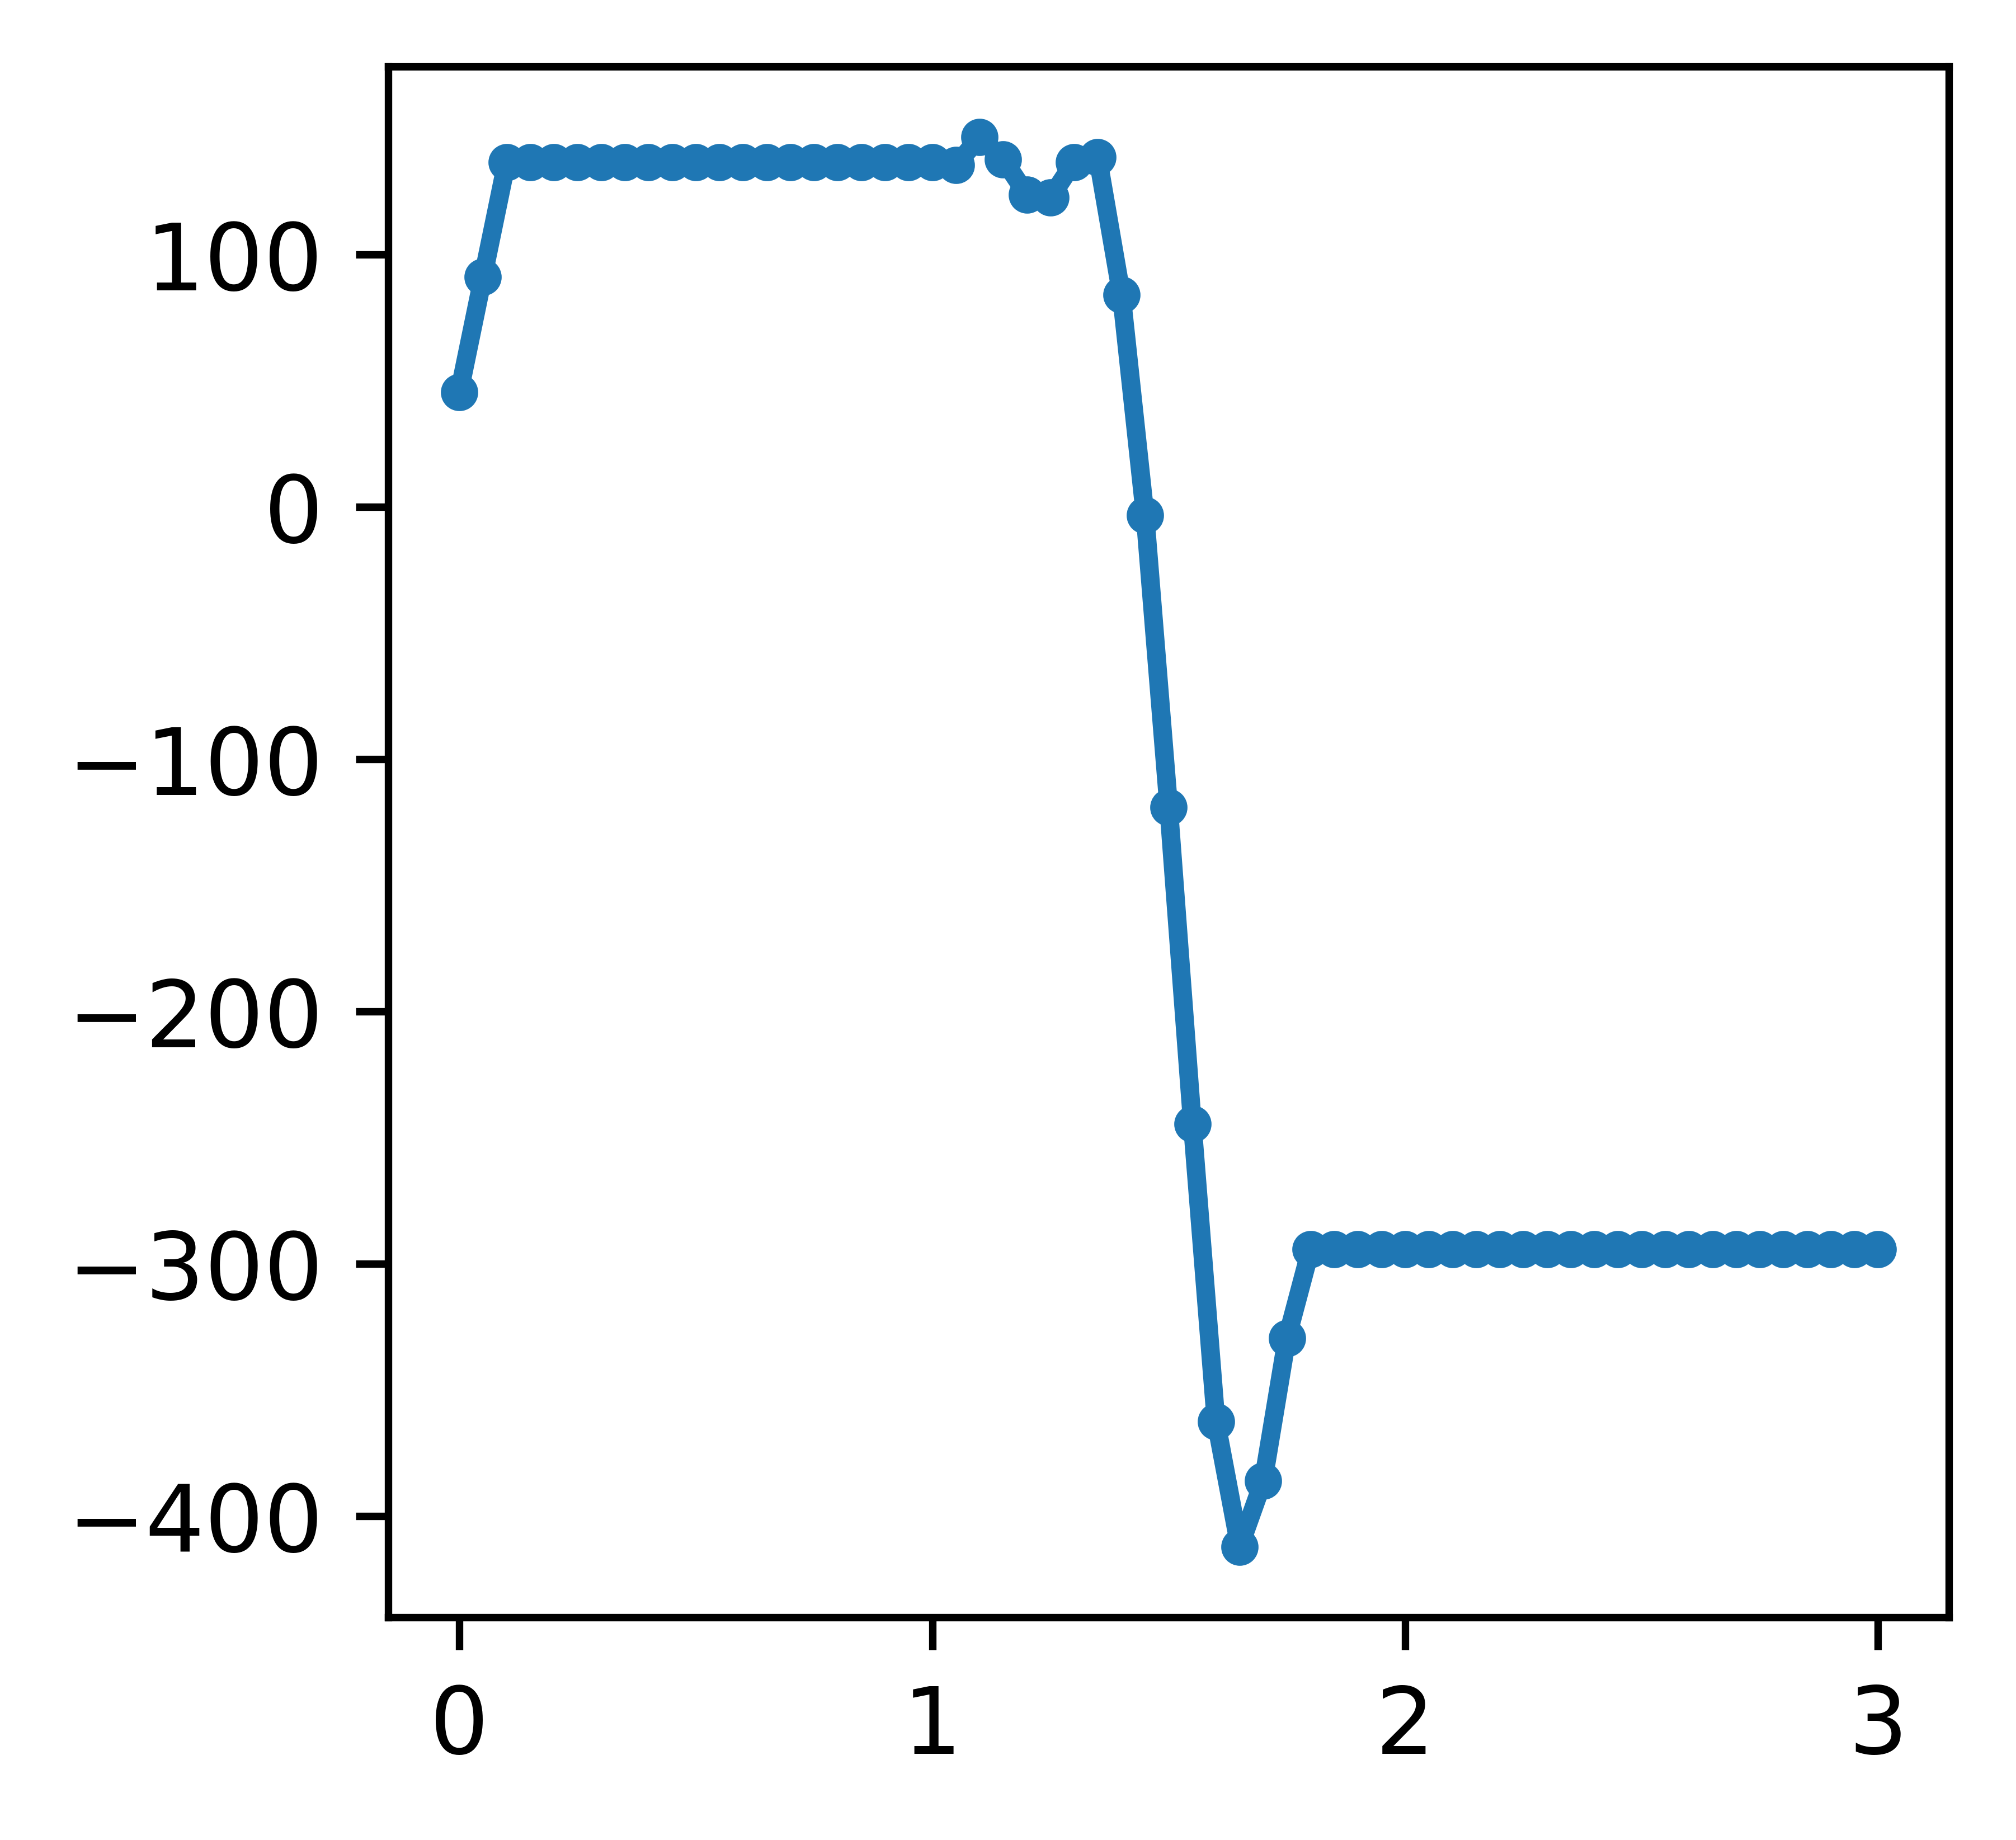

In [81]:
plt.plot(r_range, aa["F"], "o-")